In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For scikit-learn, you usually import specific components:
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset
bc_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3\Breast Cancer Wisconsin.csv')
print(bc_data.head())
print(bc_data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

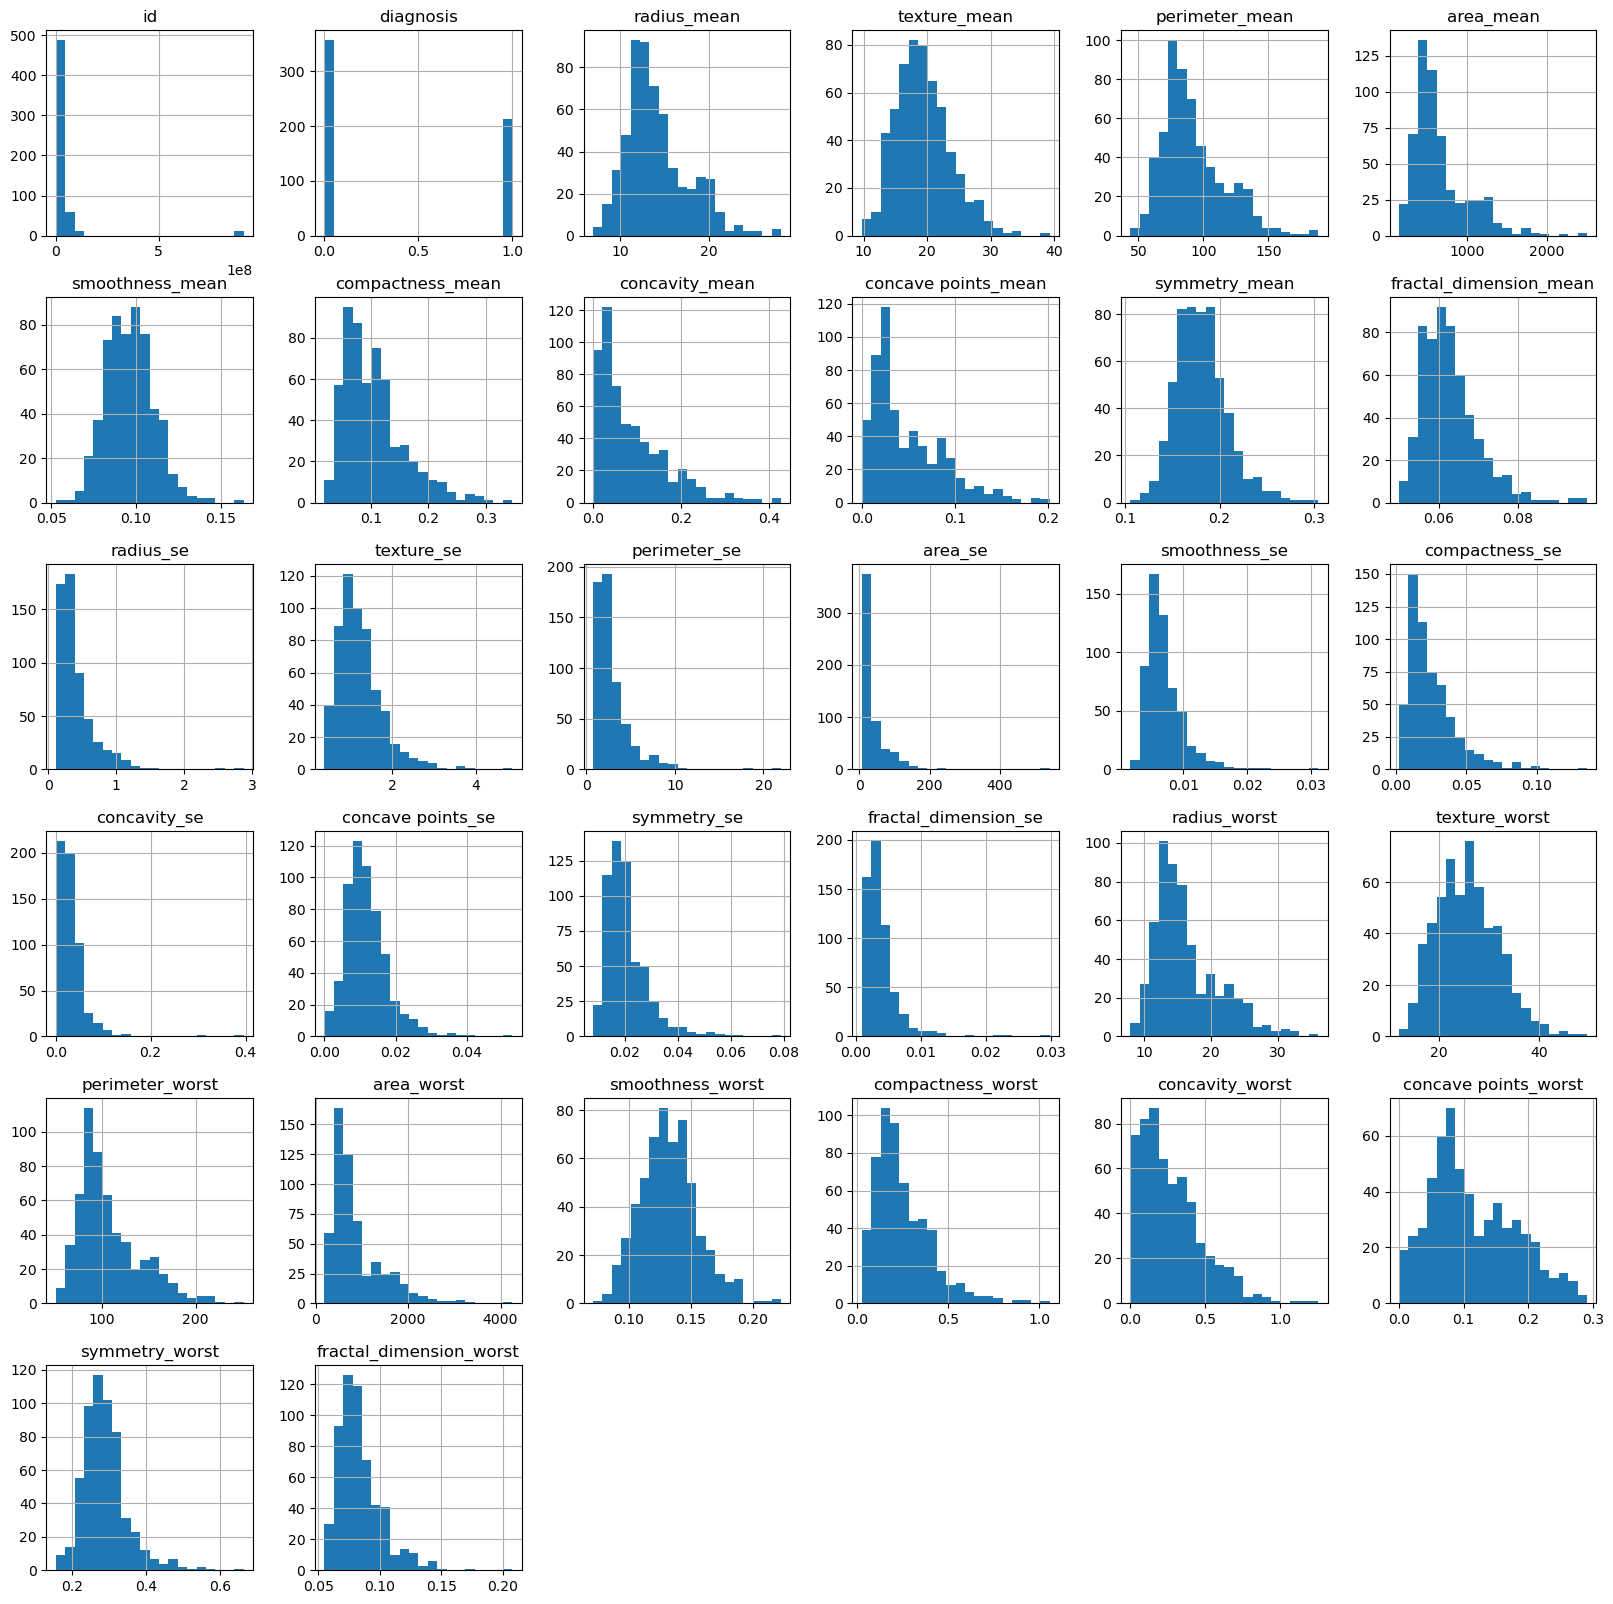

In [27]:
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})
bc_data.hist(figsize=(20, 20), bins=20)
plt.show()


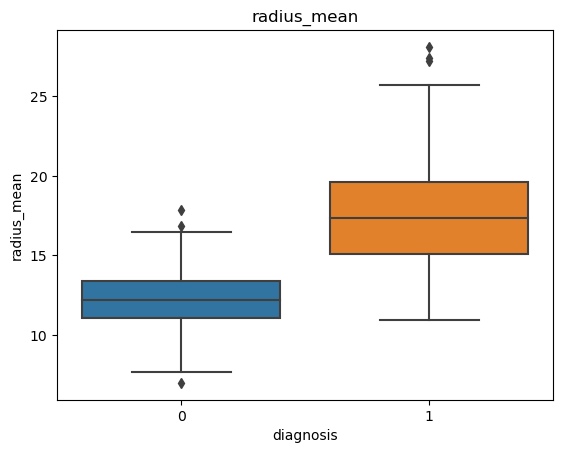

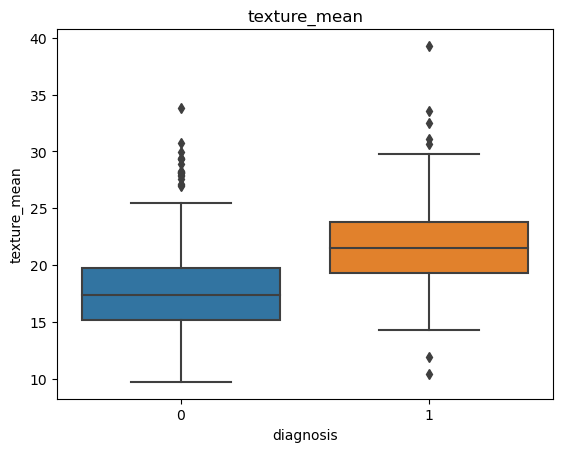

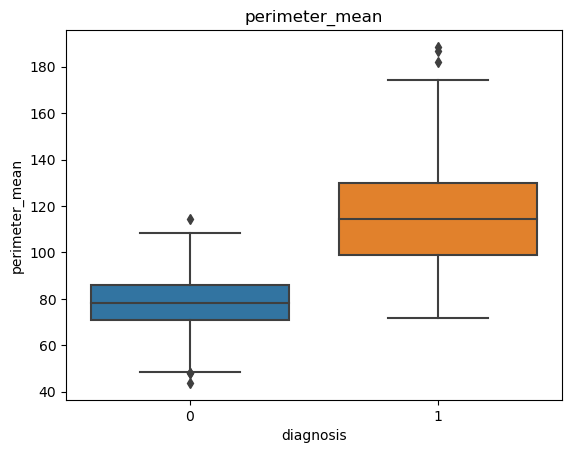

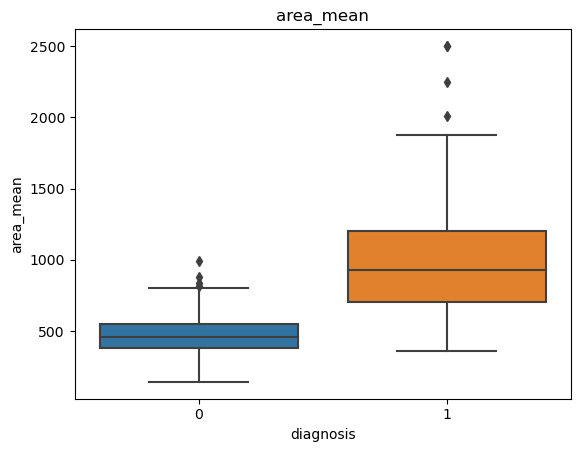

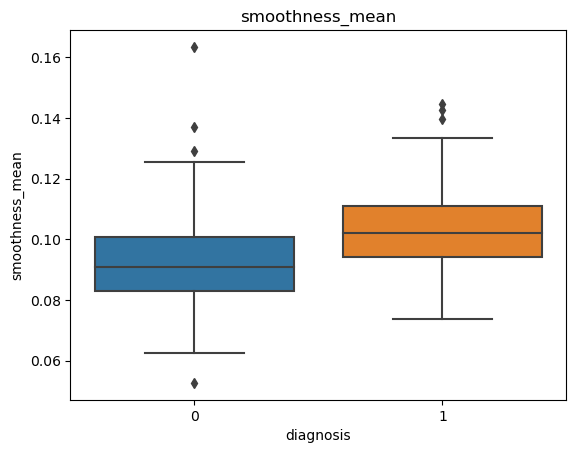

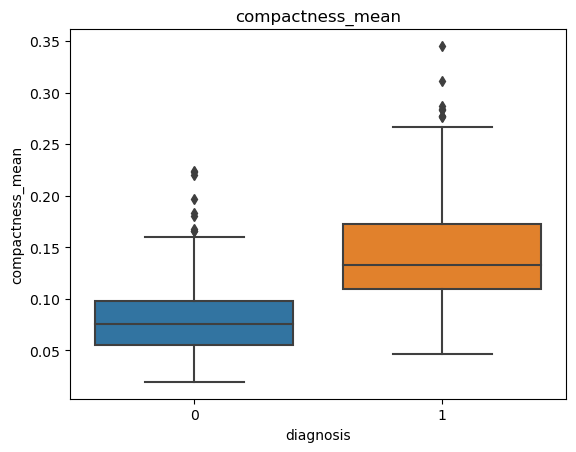

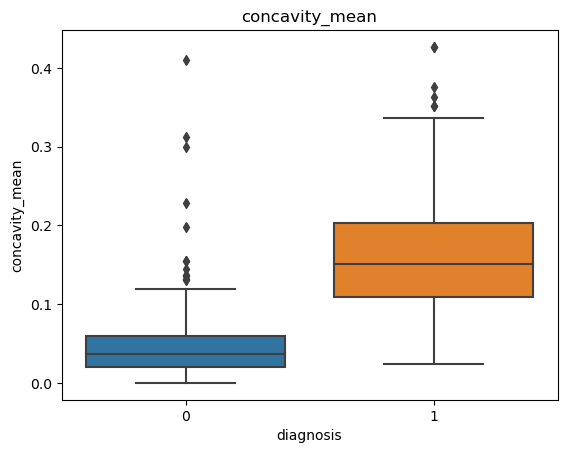

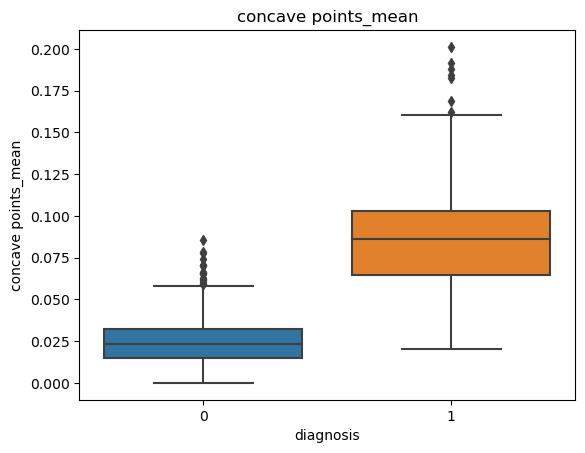

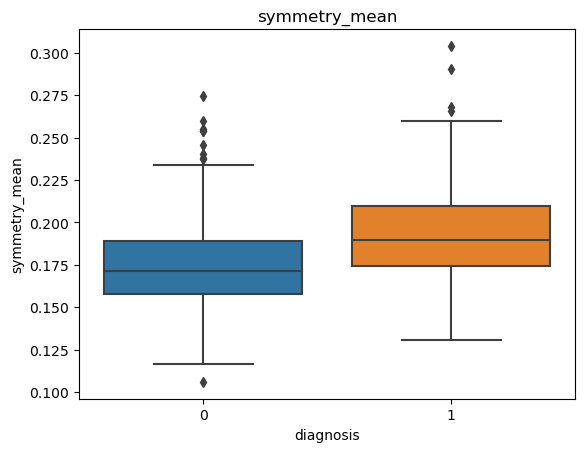

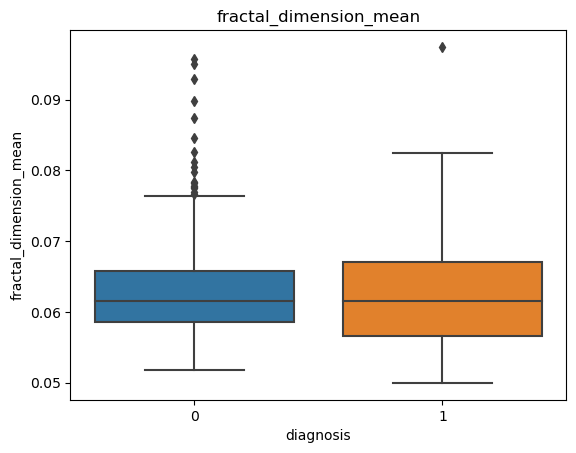

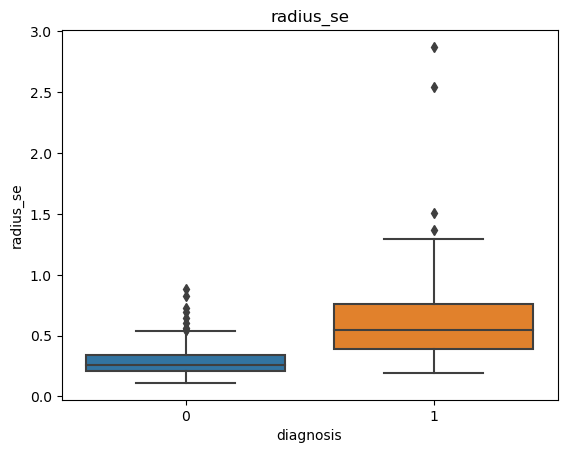

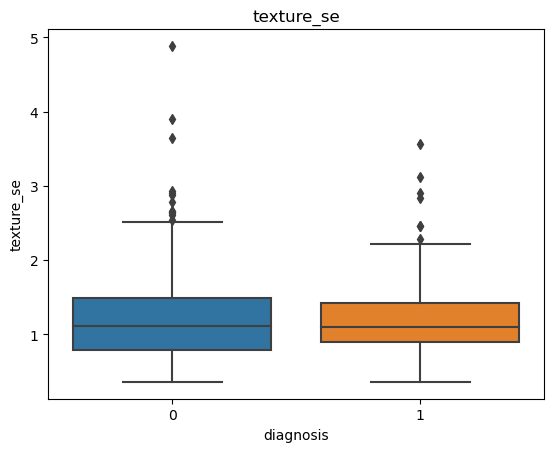

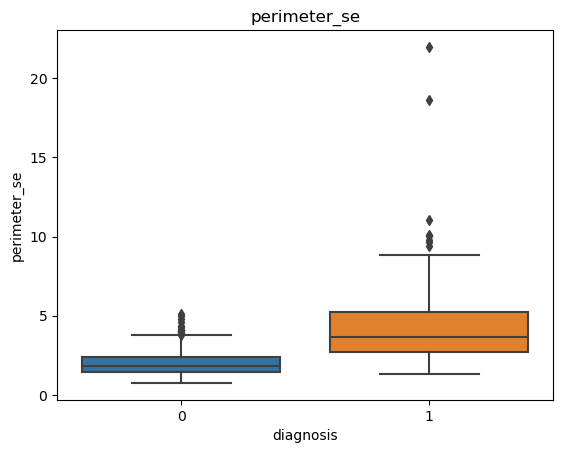

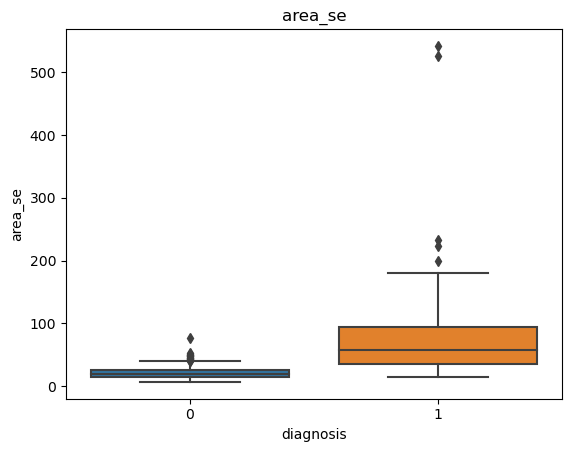

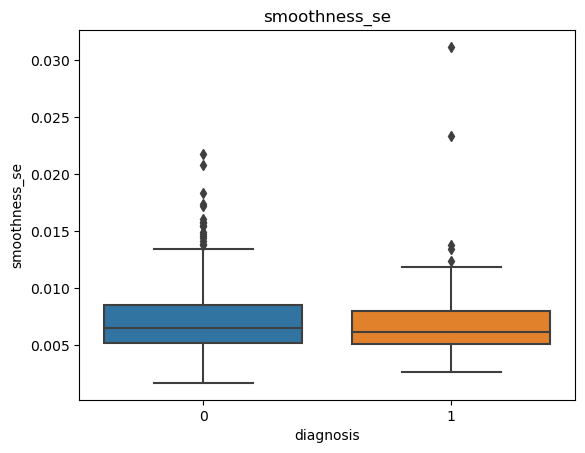

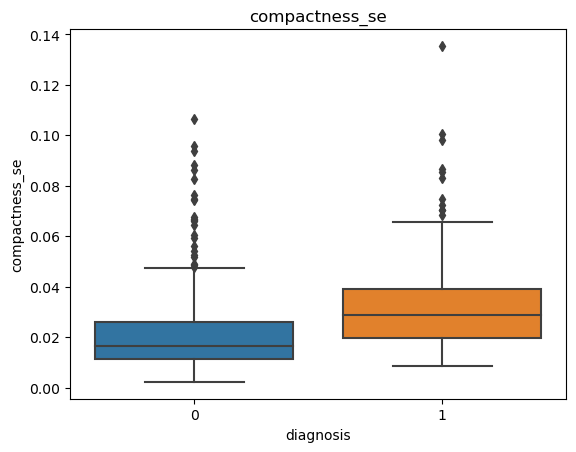

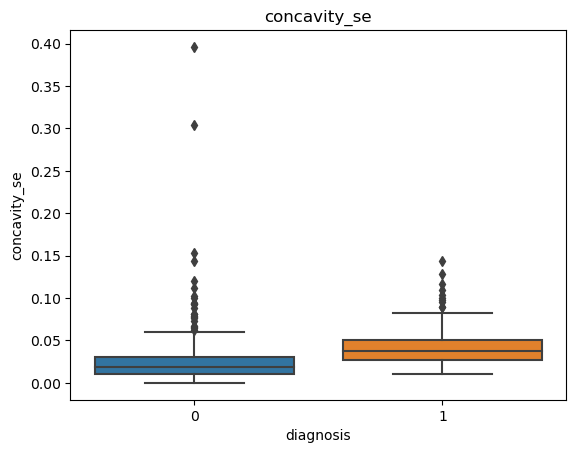

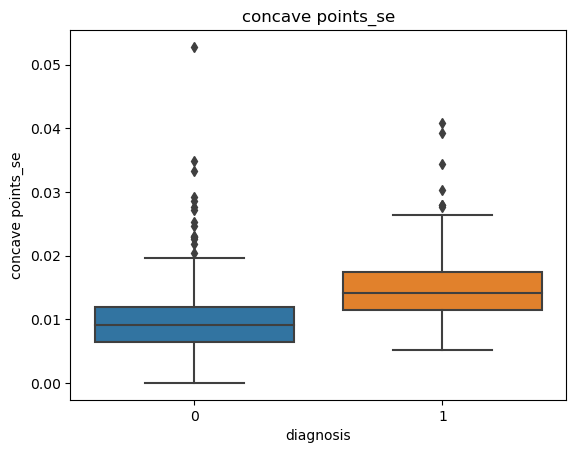

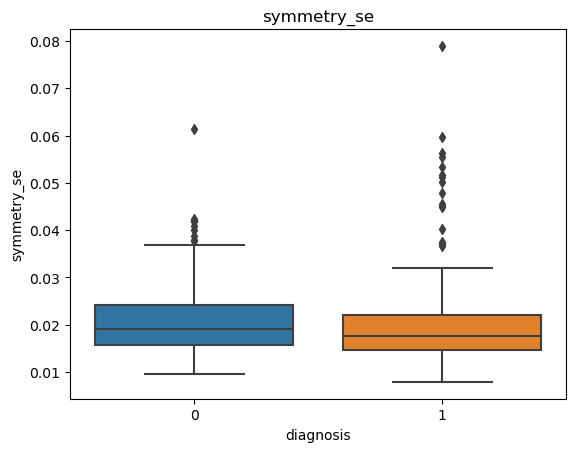

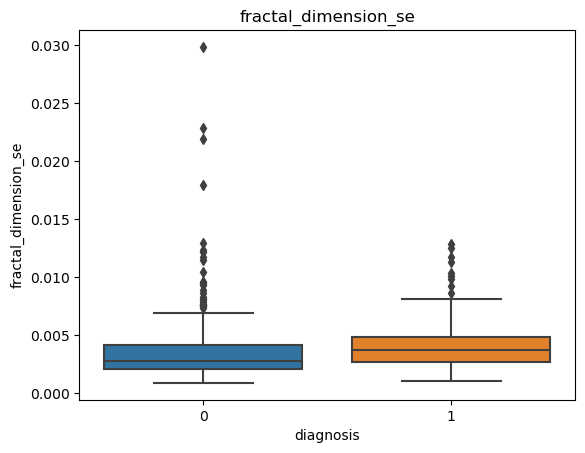

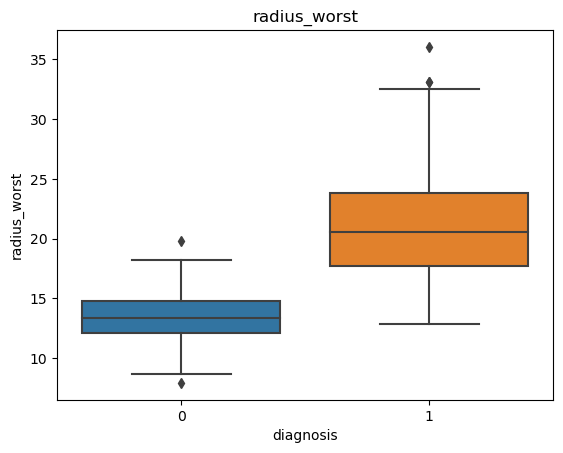

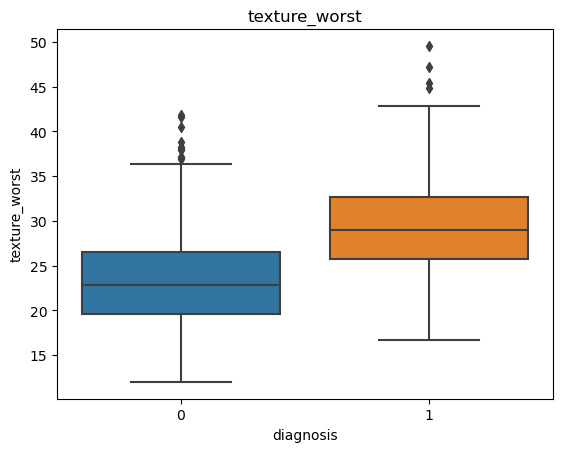

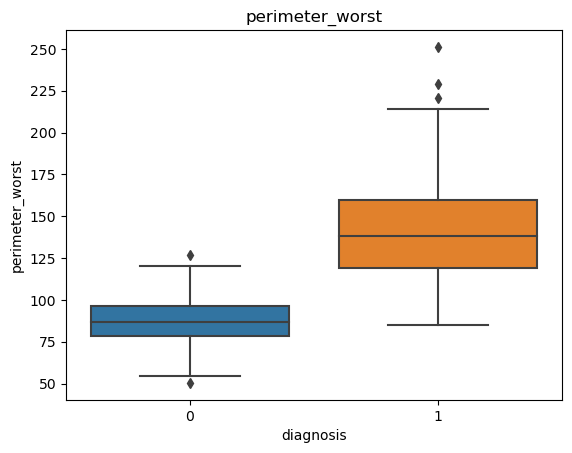

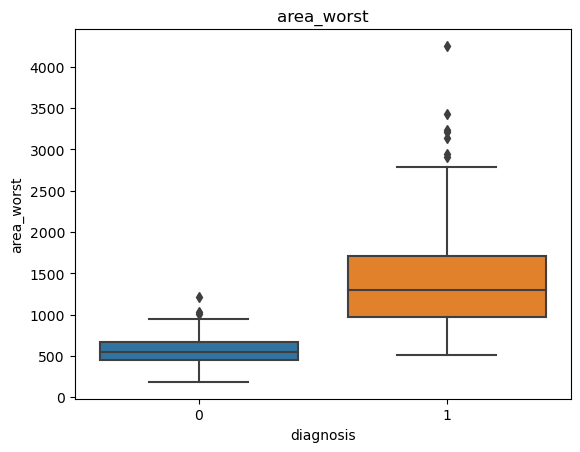

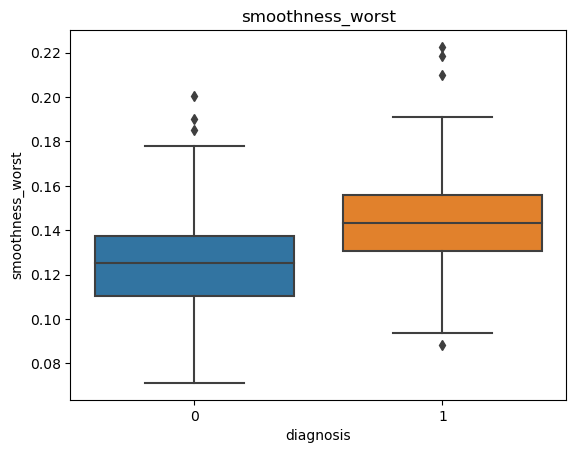

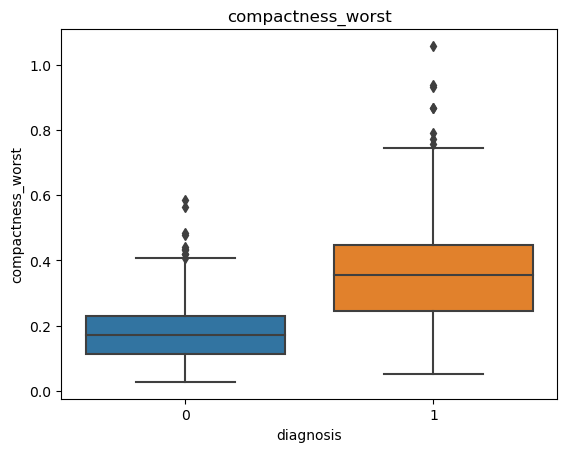

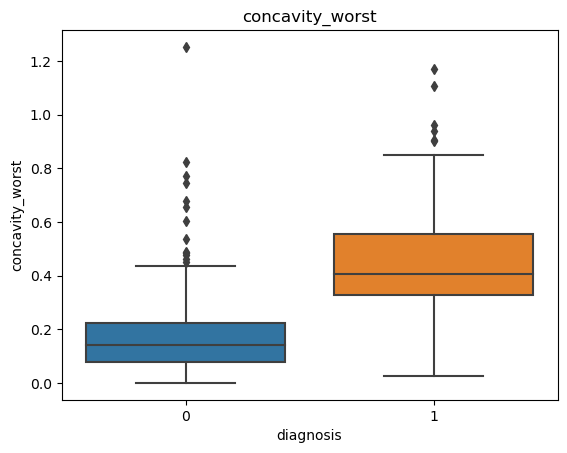

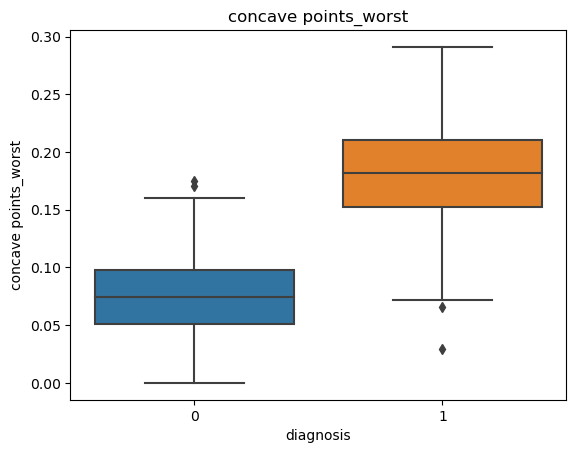

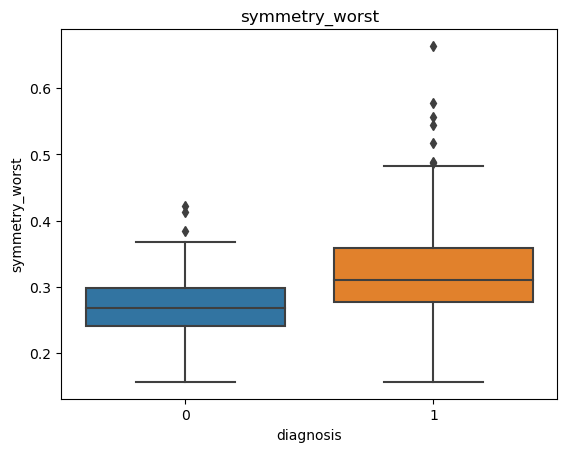

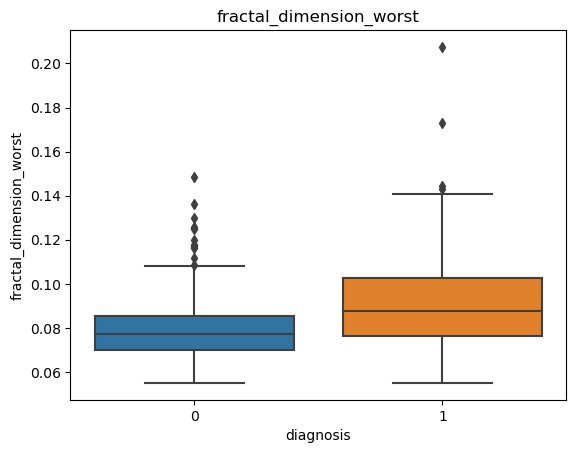

In [28]:
for column in bc_data.drop(['id', 'diagnosis'], axis=1).columns:
    sns.boxplot(x='diagnosis', y=column, data=bc_data)
    plt.title(column)
    plt.show()

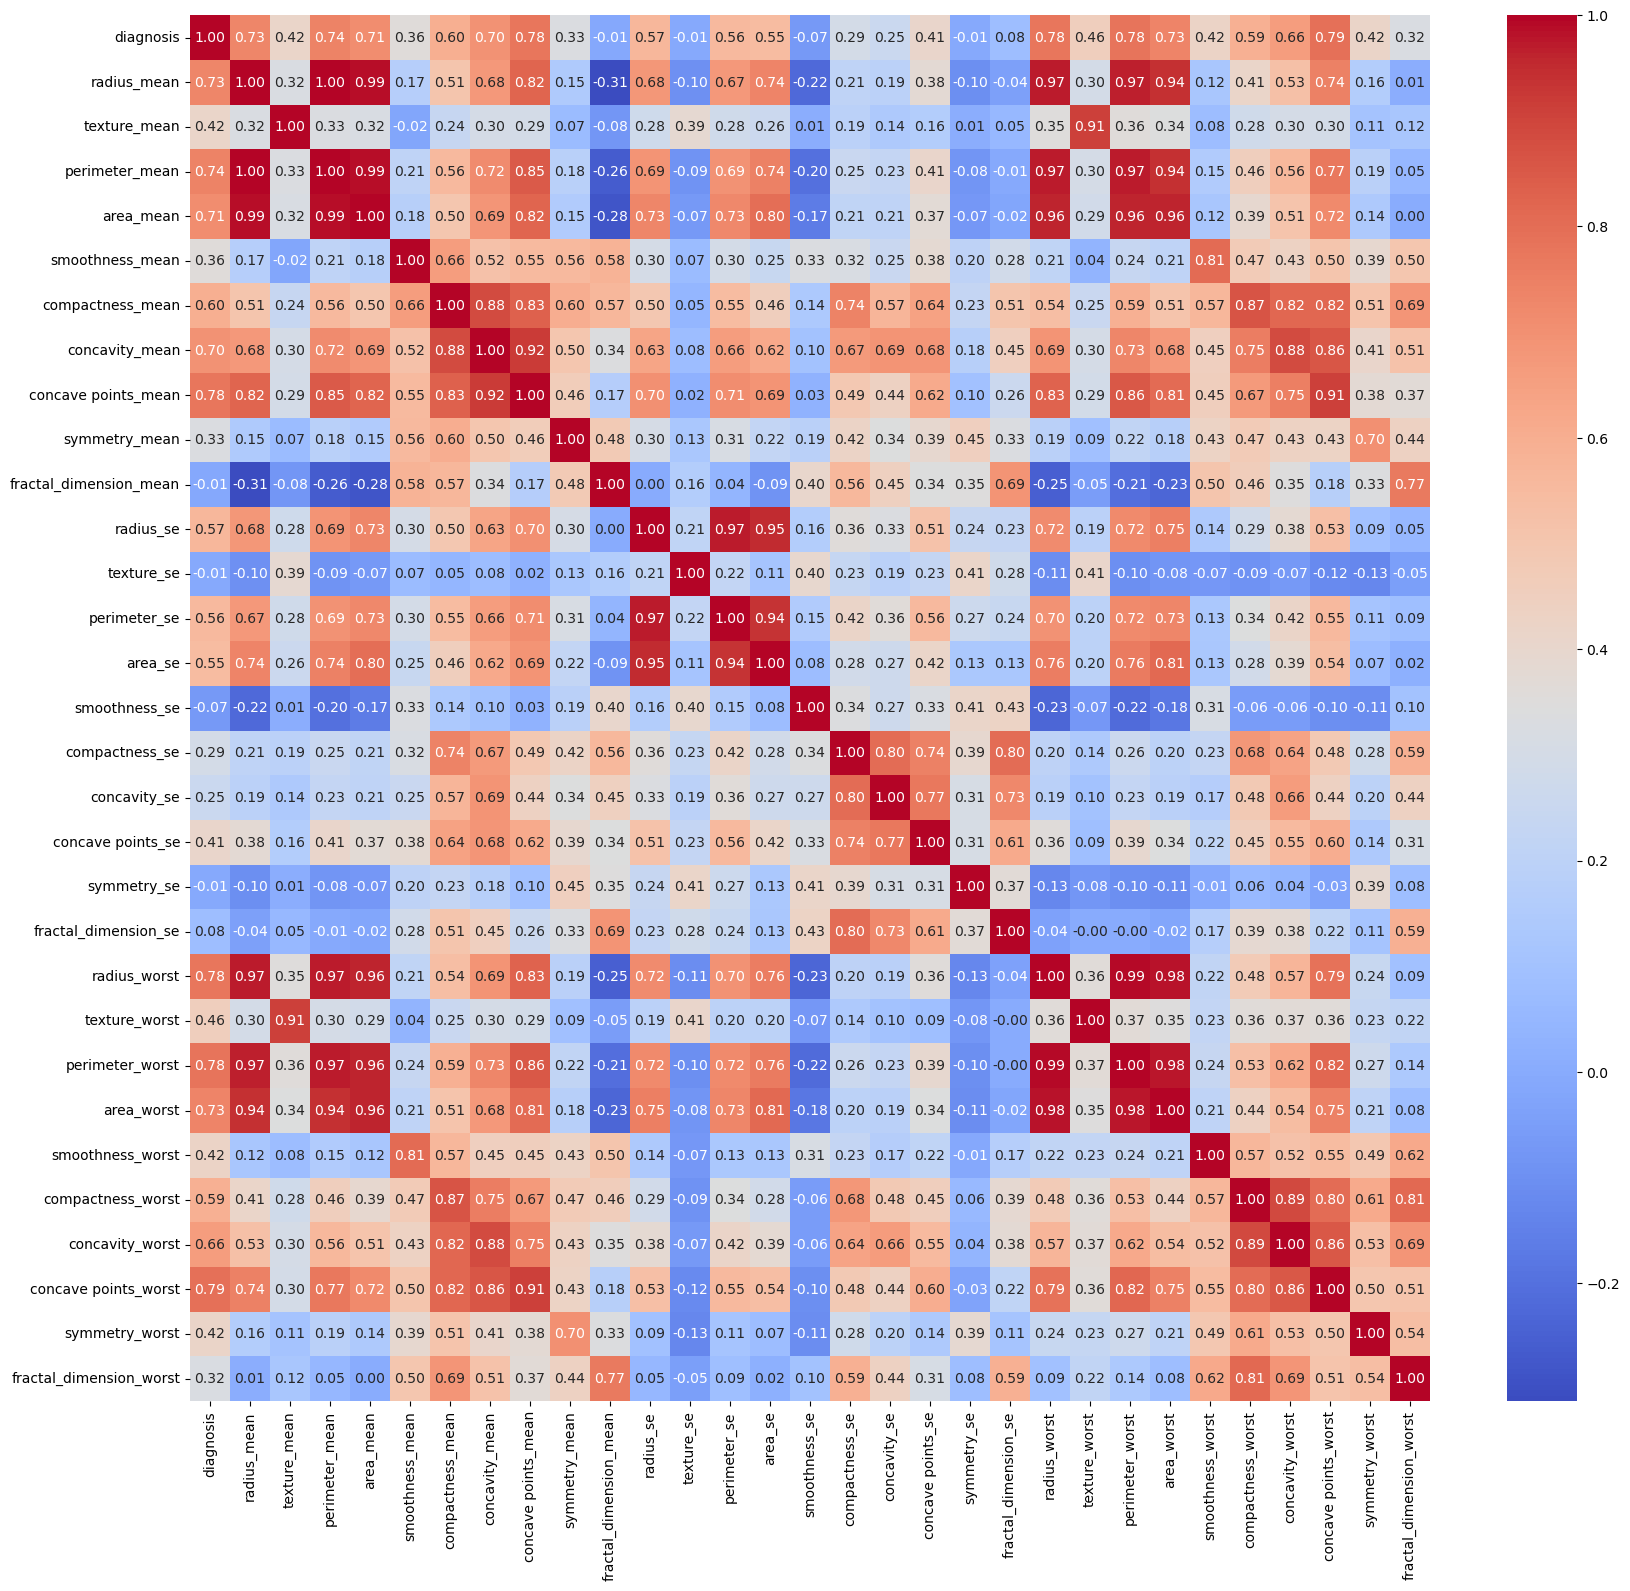

In [29]:

plt.figure(figsize=(20, 18))
sns.heatmap(bc_data.drop('id', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


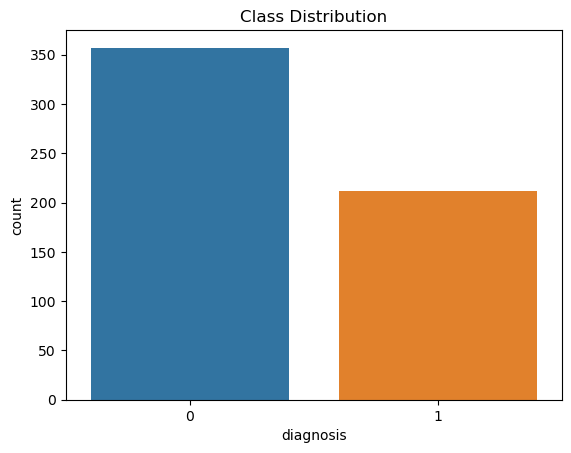

In [30]:
sns.countplot(x='diagnosis', data=bc_data)
plt.title('Class Distribution')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

# Splitting the dataset into training and testing sets
y = bc_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

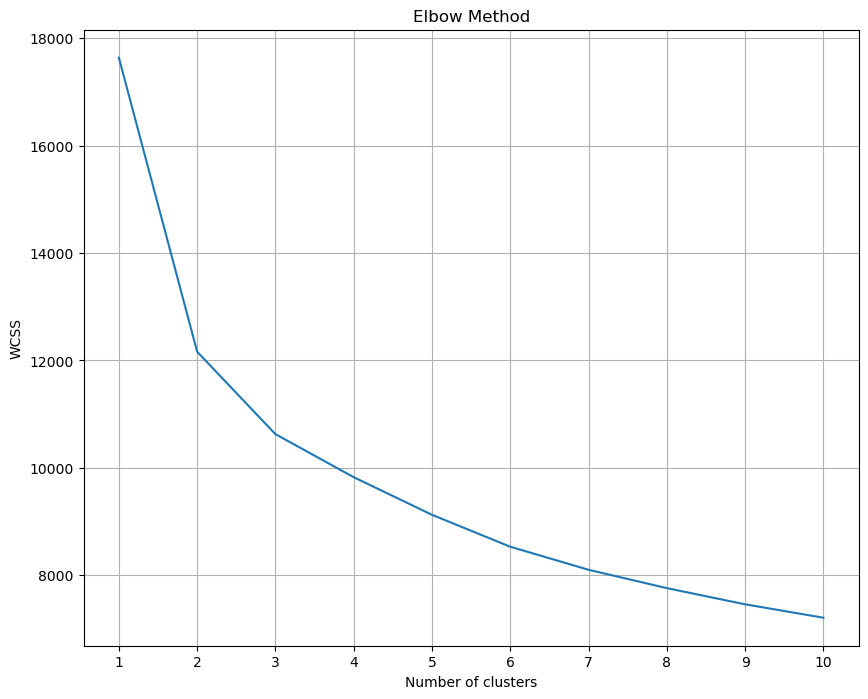

In [32]:
from sklearn.cluster import KMeans

# Determine the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results to observe the 'elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Homogeneity: 0.602
Completeness: 0.370
V-measure: 0.458
Adjusted Rand Index (ARI): 0.549


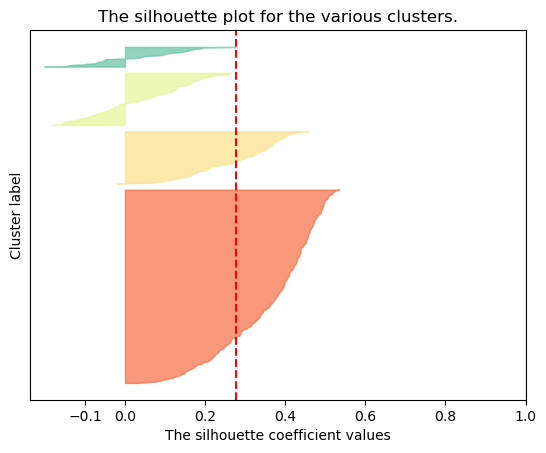

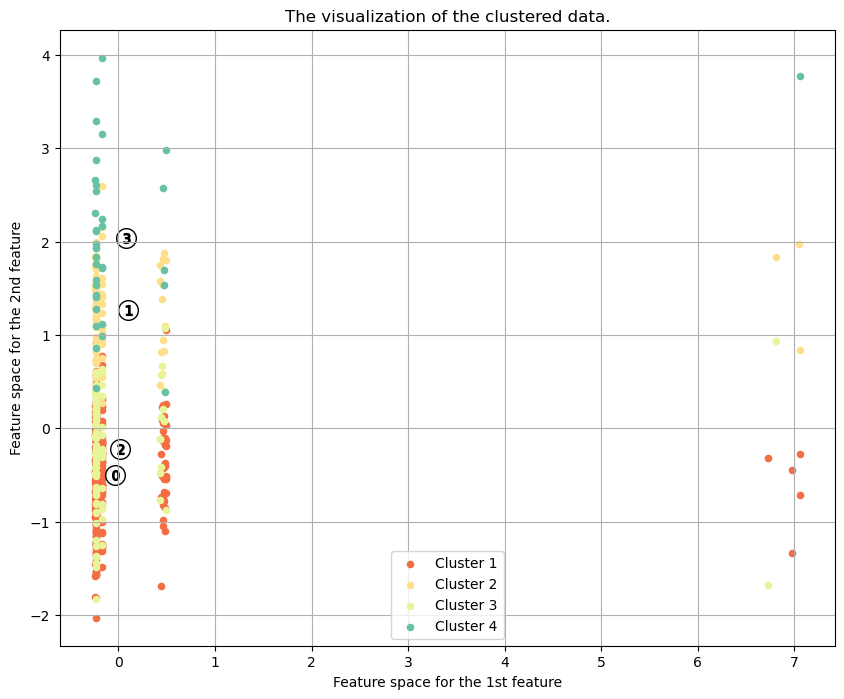

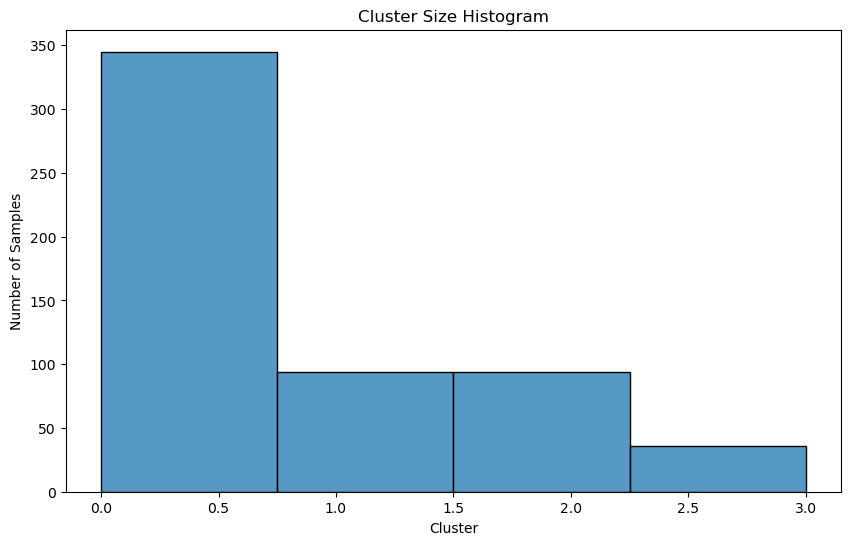

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the optimal number of clusters was found to be 4 from the elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_scaled, clusters)
sample_silhouette_values = silhouette_samples(X_scaled, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = sns.color_palette("Spectral", optimal_k)[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = sns.color_palette("Spectral", optimal_k)
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], 
                label='Cluster ' + str(i + 1),
                s=20, color=color)

# Labeling the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.legend()
plt.grid(True)

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, bins=optimal_k, kde=False)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Calculate Metrics
homogeneity = homogeneity_score(y, clusters)
completeness = completeness_score(y, clusters)
v_measure = v_measure_score(y, clusters)
ARI = adjusted_rand_score(y, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

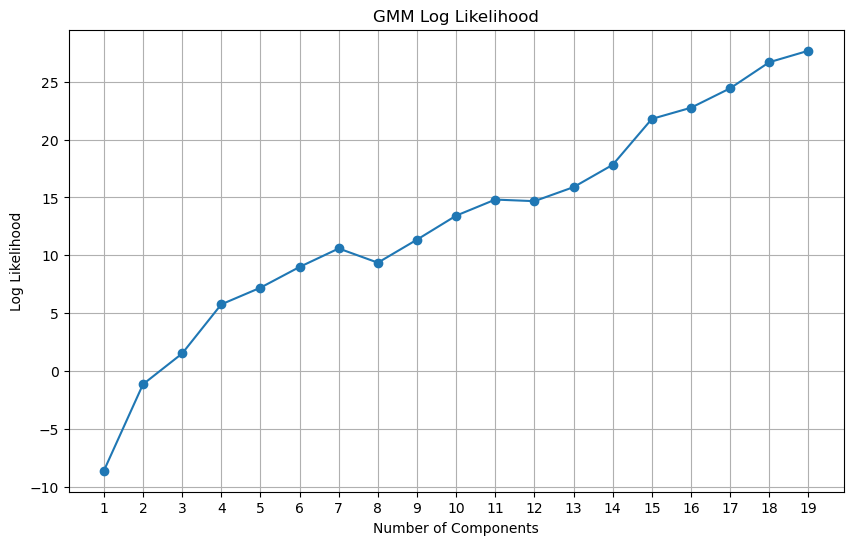

In [34]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Try a range of components and compute the GMM for each
n_components_range = range(1, 20)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    # The higher the log likelihood, the better
    log_likelihoods.append(gmm.score(X_scaled))  # score() returns log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(list(n_components_range))
plt.show()


Homogeneity (GMM): 0.666
Completeness (GMM): 0.252
V-measure (GMM): 0.366
Adjusted Rand Index (GMM): 0.248


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


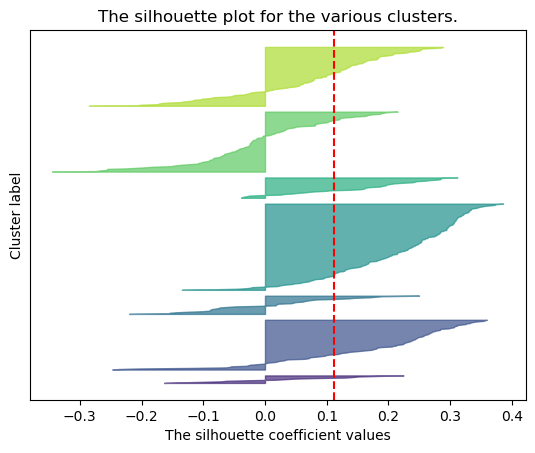

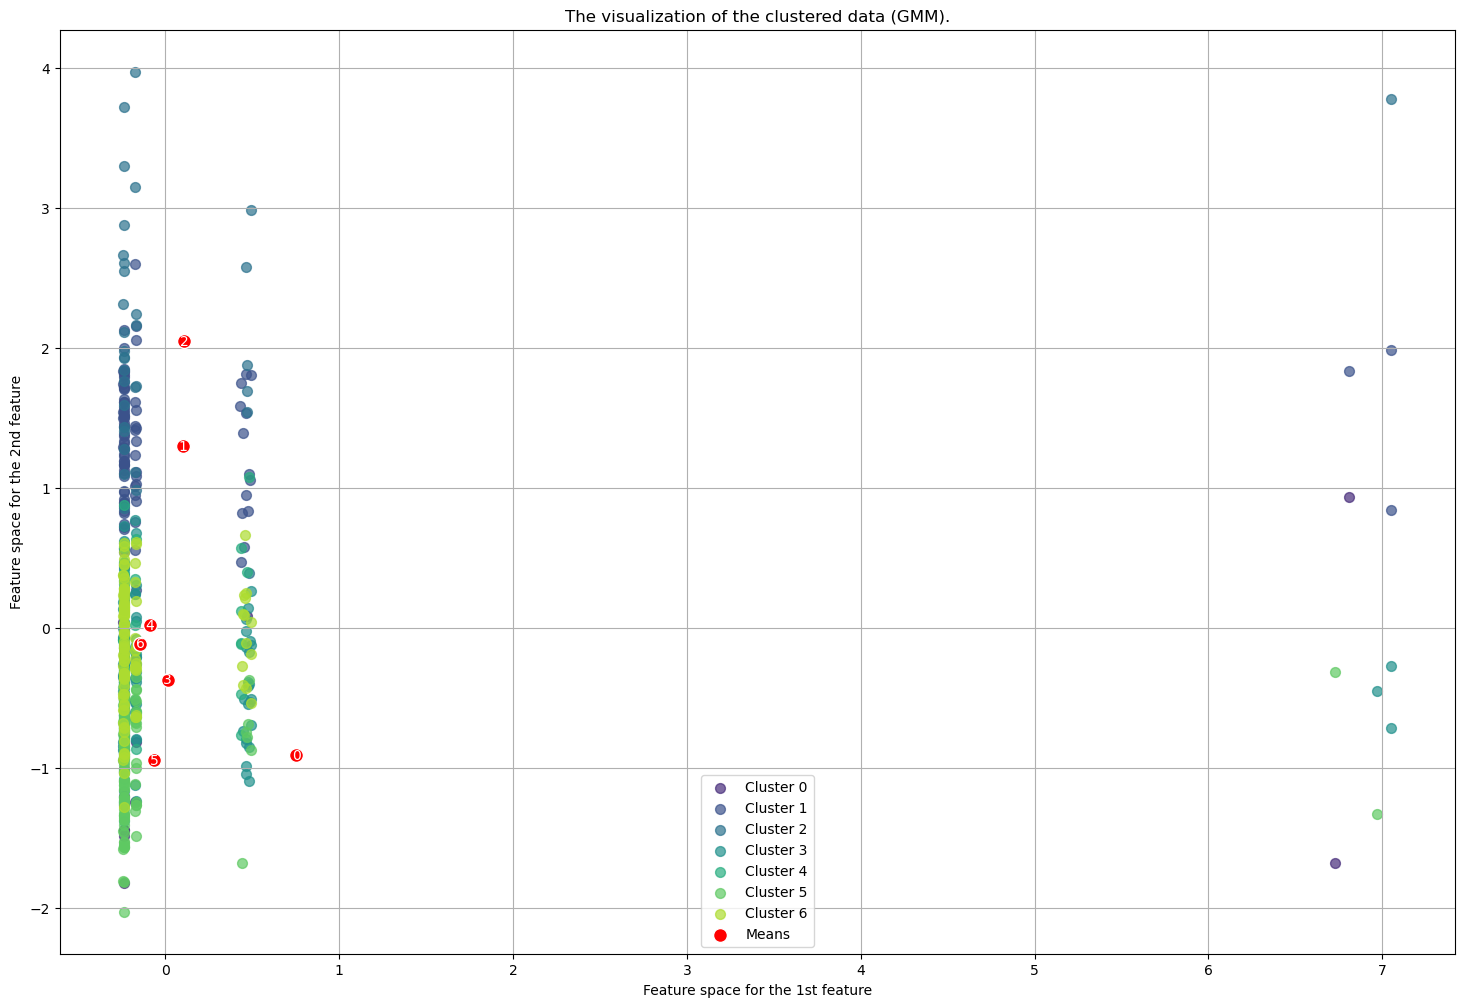

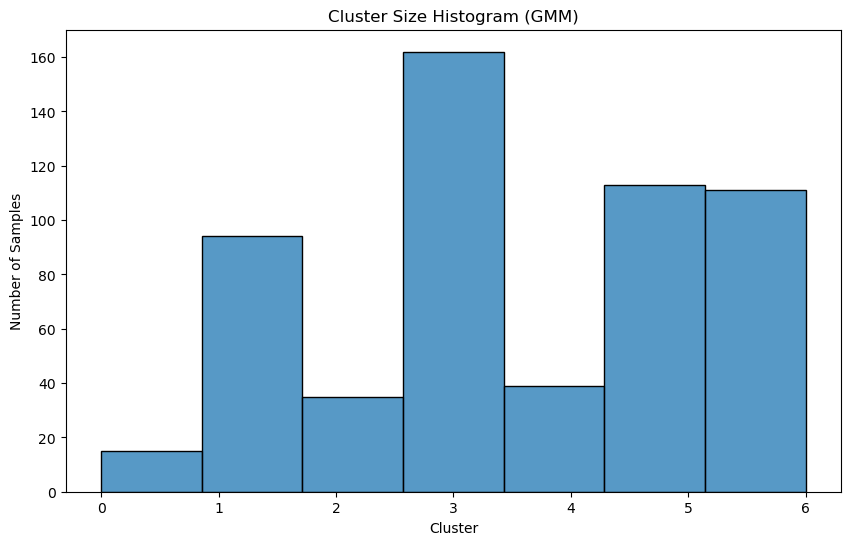

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Given that you decided on 7 components for GMM
optimal_k = 7

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_scaled, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_scaled, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

# Annotate the cluster means
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.grid(True)
plt.legend()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y, gmm_clusters)
gmm_completeness = completeness_score(y, gmm_clusters)
gmm_v_measure = v_measure_score(y, gmm_clusters)
gmm_ARI = adjusted_rand_score(y, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')

plt.show()


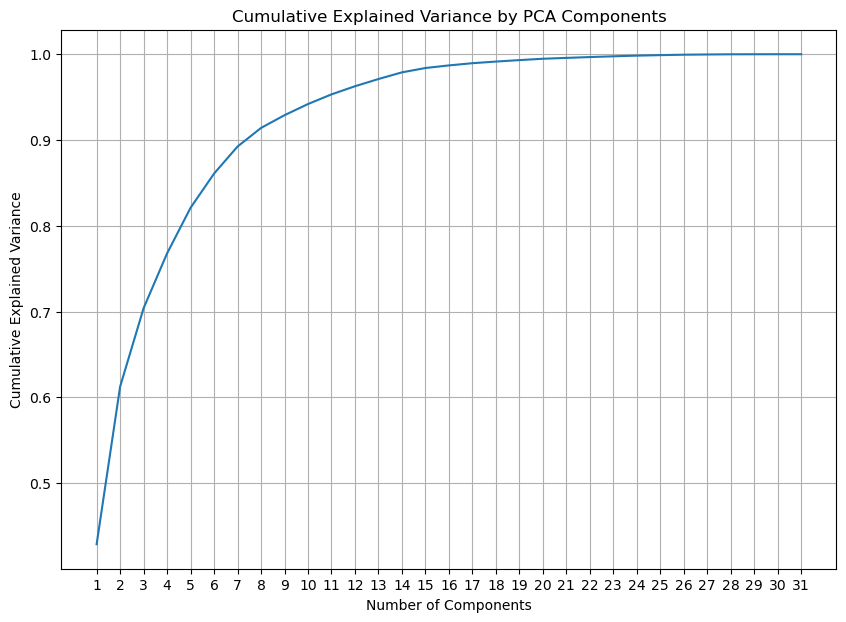

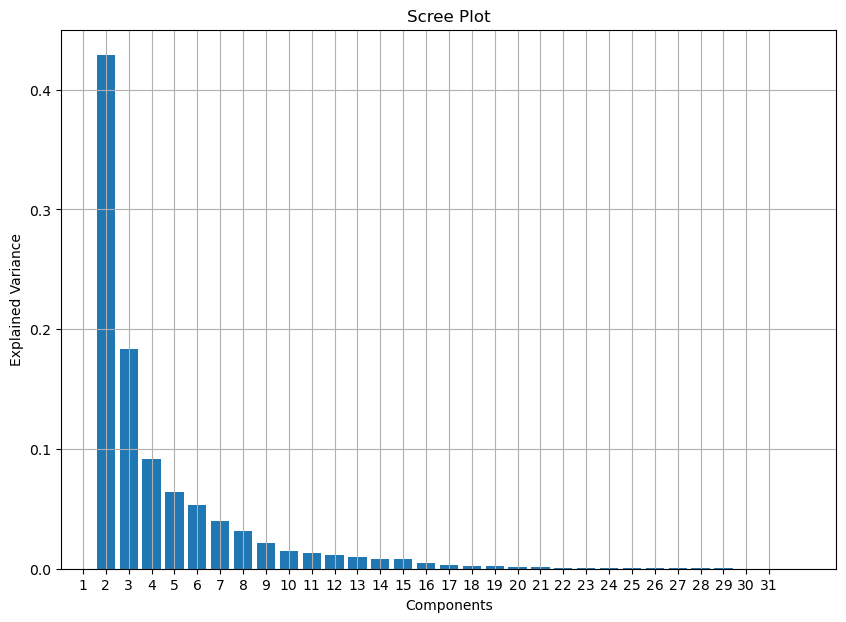

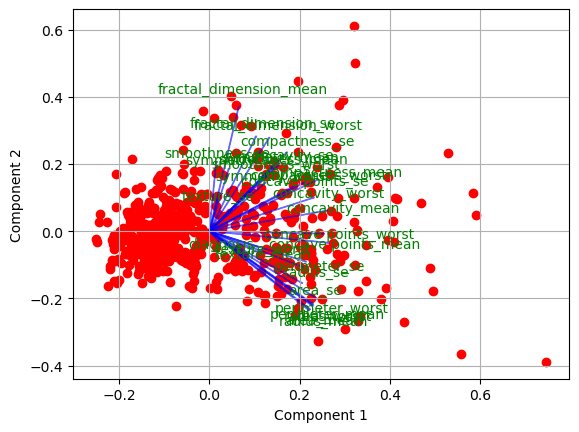

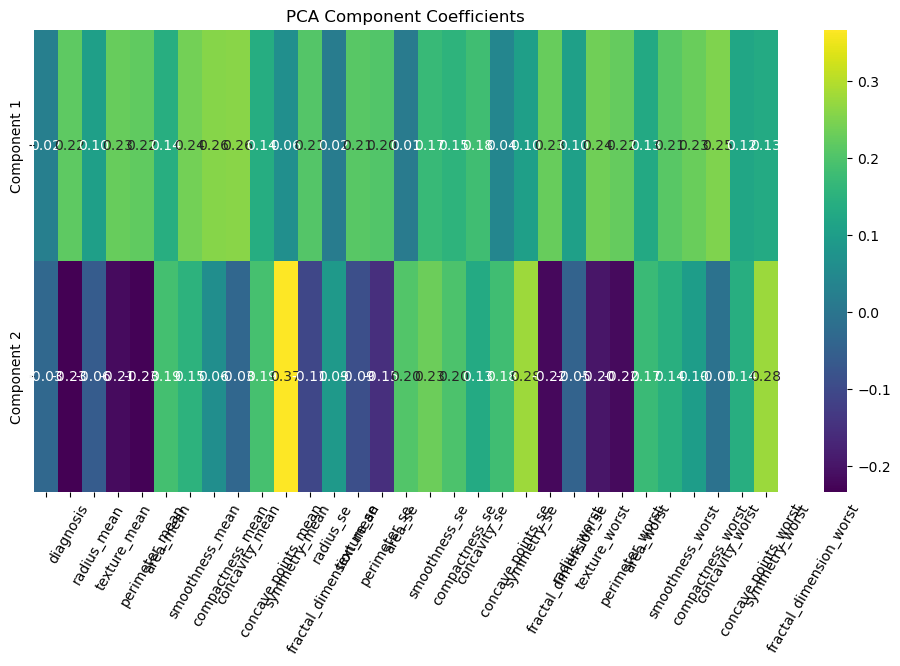

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Apply PCA
pca = PCA().fit(X_scaled)

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(ticks=range(len(pca.explained_variance_ratio_)), labels=[str(i+1) for i in range(len(pca.explained_variance_ratio_))])
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Scree Plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.xticks(ticks=range(len(pca.explained_variance_ratio_)), labels=[str(i+1) for i in range(len(pca.explained_variance_ratio_))])
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Biplot (for the first two principal components)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = 'r')
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'b', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()

# Only plot the first two pcs
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
biplot(X_pca_2[:,0:2], np.transpose(pca_2.components_[0:2, :]), labels=bc_data.columns[1:])  # Exclude 'id'
plt.show()

# Coefficient Plot for the first 2 principal components
plt.figure(figsize=(12, 6))
feature_names = bc_data.columns[1:]  # Exclude 'id' column
sns.heatmap(pca_2.components_, annot=True, cmap='viridis', fmt=".2f", xticklabels=feature_names, yticklabels=['Component 1', 'Component 2'])
plt.xticks(rotation=60, ha='left')
plt.title('PCA Component Coefficients')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

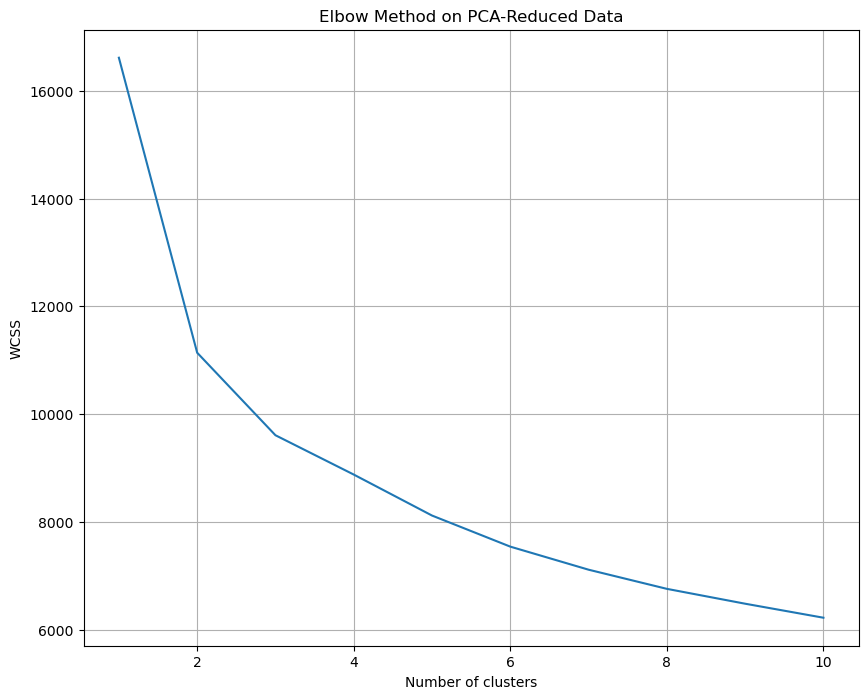

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

# Use the Elbow Method on the PCA-reduced data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca_10)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjusting the figure size for better readability
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method on PCA-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # This adds a grid to the plot
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


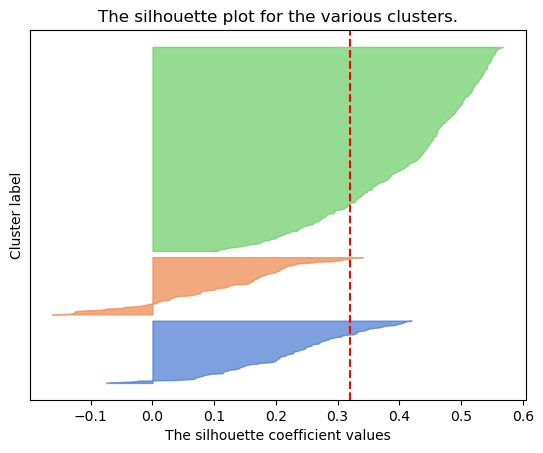

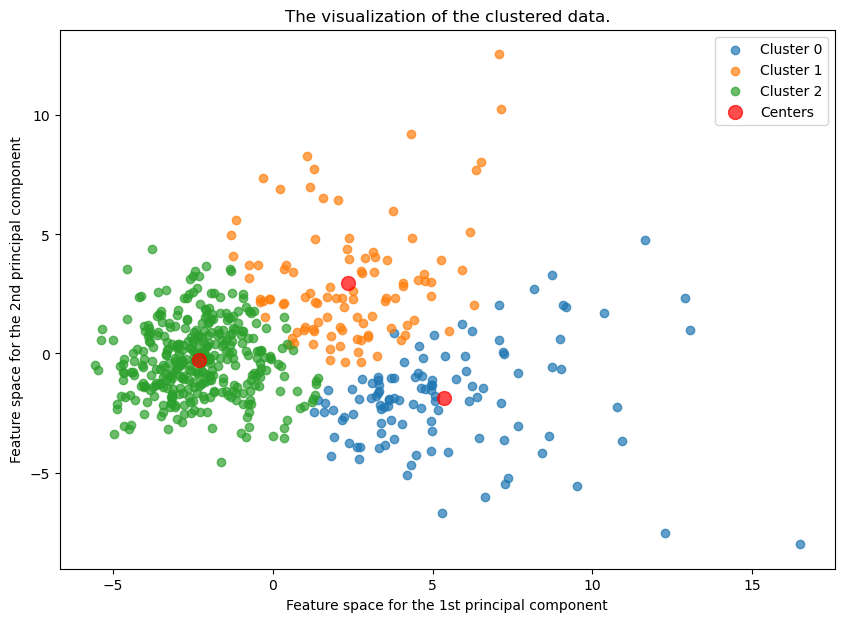

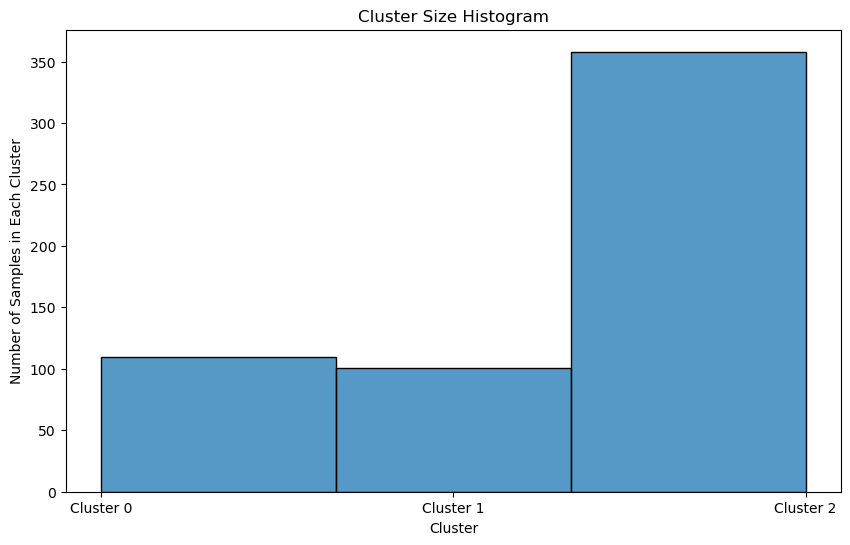

Homogeneity: 0.508
Completeness: 0.366
V-measure: 0.426
Adjusted Rand Index (ARI): 0.515


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set the number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca_10)  # Make sure to use the PCA-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_pca_10, clusters)
sample_silhouette_values = silhouette_samples(X_pca_10, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)  # Adjusted the palette for the number of clusters

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_pca_10[cluster_mask, 0], X_pca_10[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st principal component")
plt.ylabel("Feature space for the 2nd principal component")
plt.legend()
plt.show()

# Convert y to integers if it's not already
if not np.issubdtype(y.dtype, np.integer):
    y_integer_encoded = LabelEncoder().fit_transform(y)  # Encode non-integer labels to integers
else:
    y_integer_encoded = y

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()

# Calculate Metrics
homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

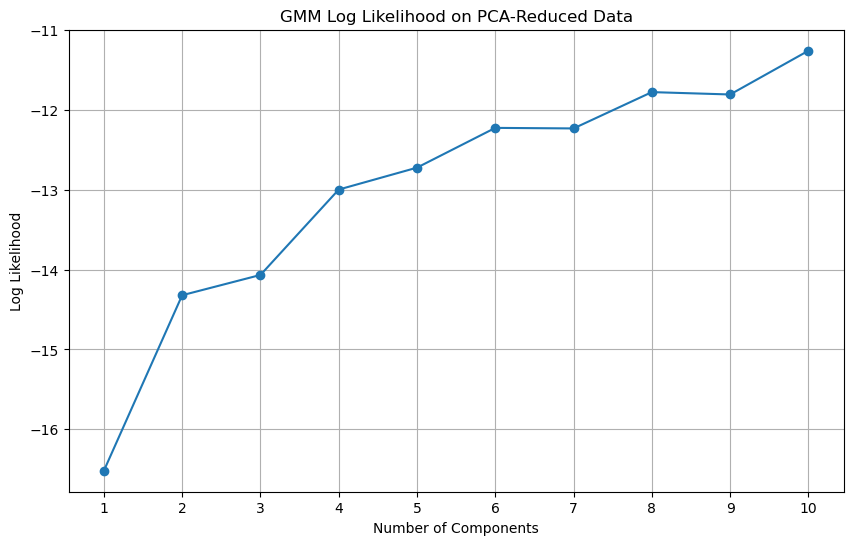

In [39]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_components_range = range(1, 11) 
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca_10)  # Fit GMM on the PCA-reduced data
    # The higher the log likelihood, the better
    log_likelihoods.append(gmm.score(X_pca_10))  # score() returns log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on PCA-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


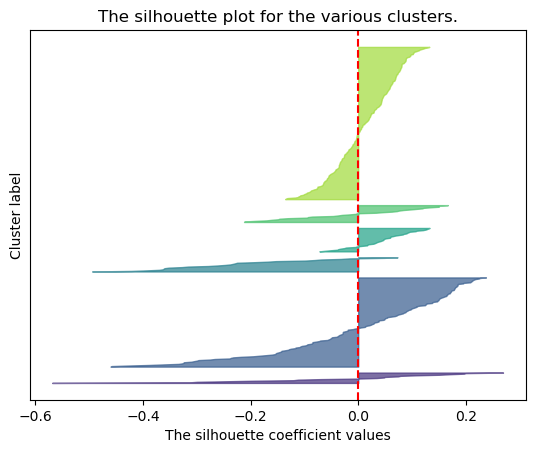

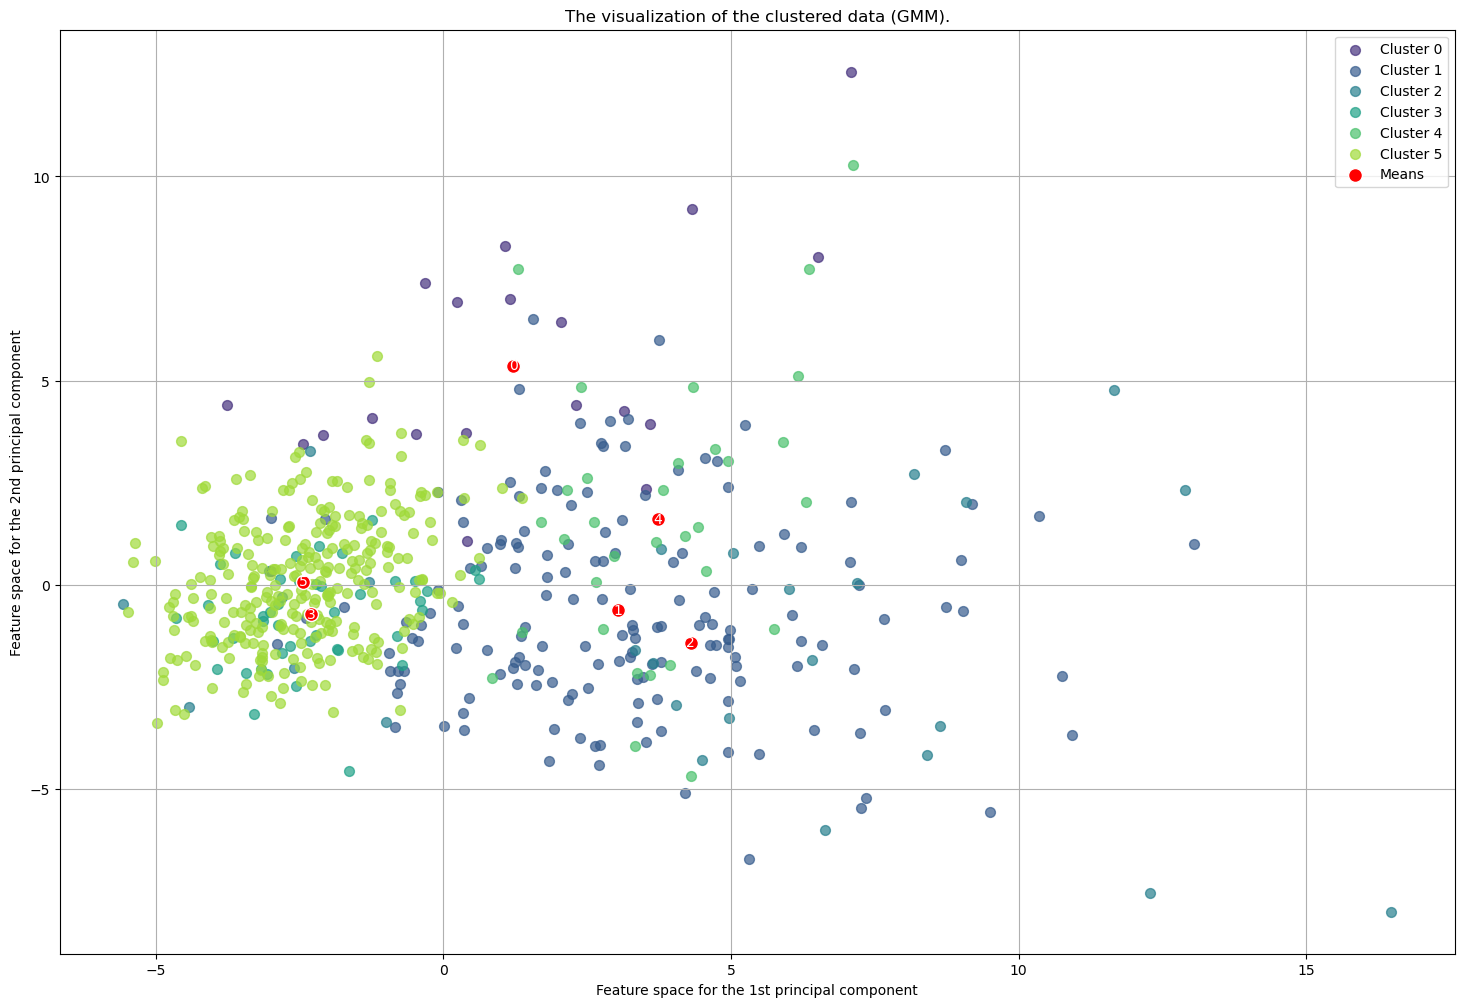

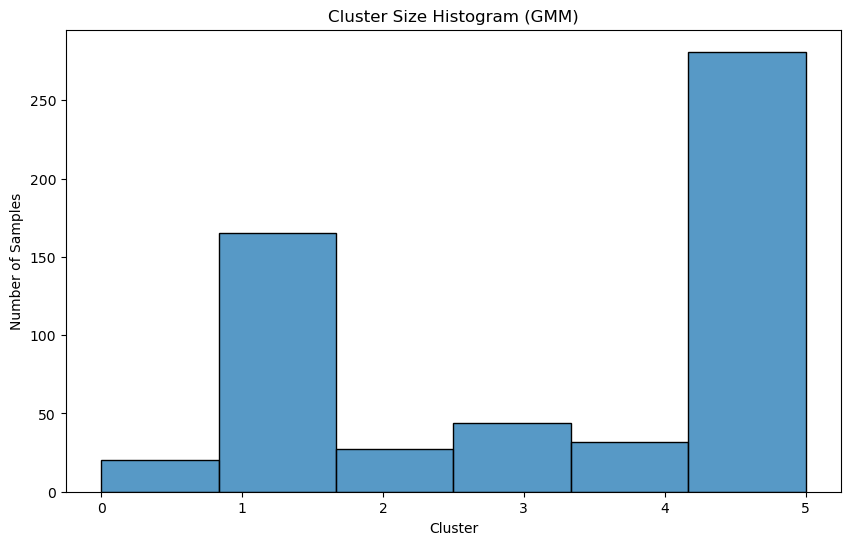

Homogeneity (GMM): 0.693
Completeness (GMM): 0.344
V-measure (GMM): 0.460
Adjusted Rand Index (GMM): 0.526


In [40]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Apply the Gaussian Mixture Model with 6 components as decided
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca_10)  # Using the PCA-reduced data here

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_pca_10, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_pca_10, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=6)

for i in range(6):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(6):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(X_pca_10[cluster_mask, 0], X_pca_10[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

# Annotate the cluster means
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st principal component")
plt.ylabel("Feature space for the 2nd principal component")
plt.legend()
plt.grid(True)
plt.show()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=6)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

plt.show()

# Encode the target if it's not already
if not np.issubdtype(y.dtype, np.integer):
    y_encoded = LabelEncoder().fit_transform(y)
else:
    y_encoded = y

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')


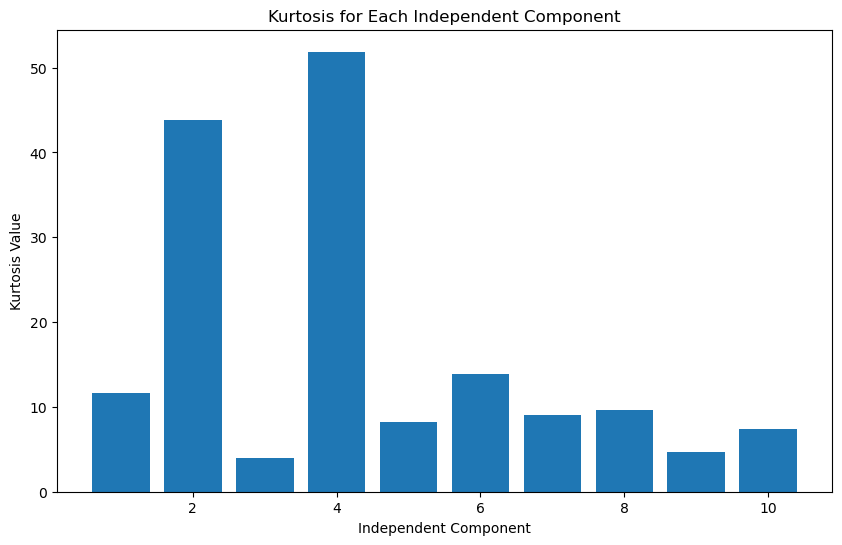

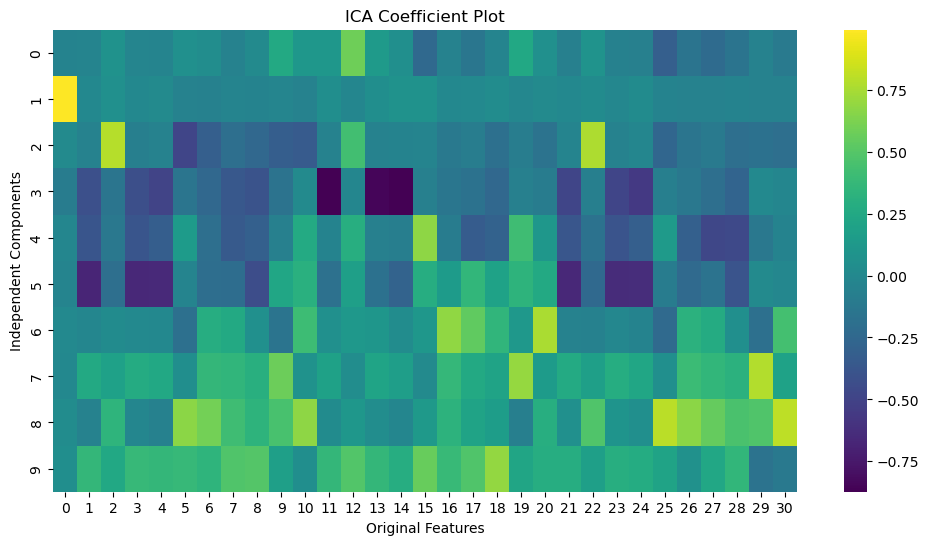

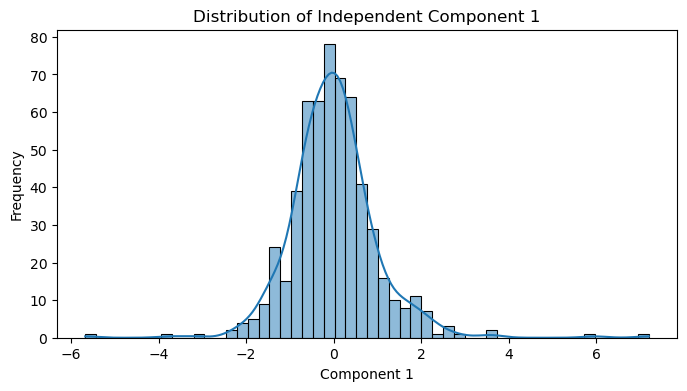

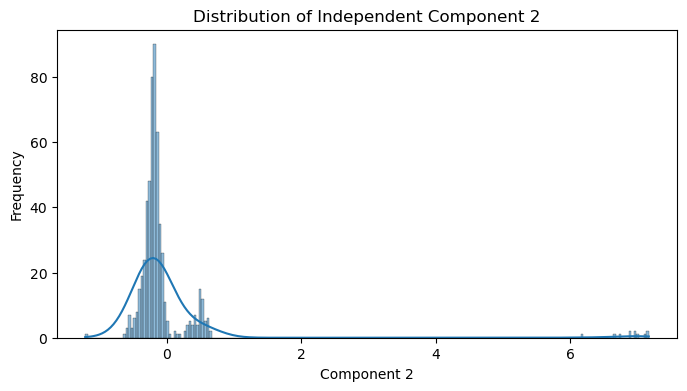

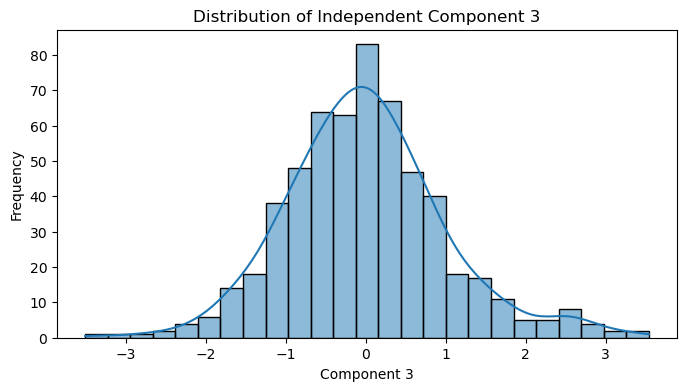

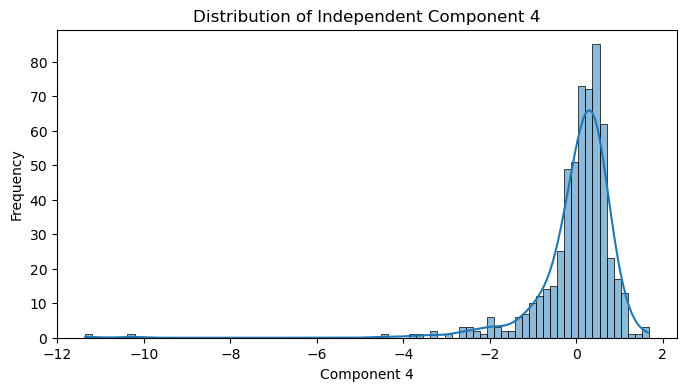

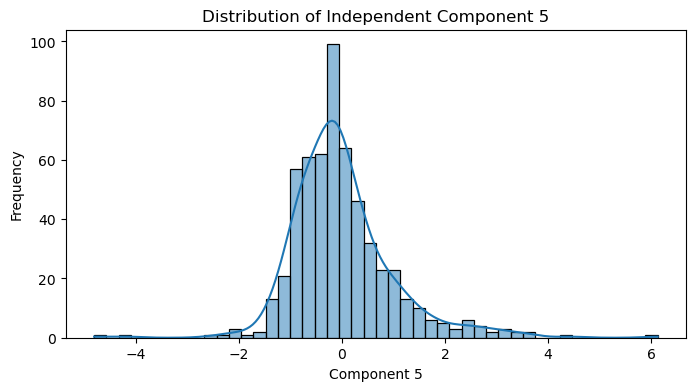

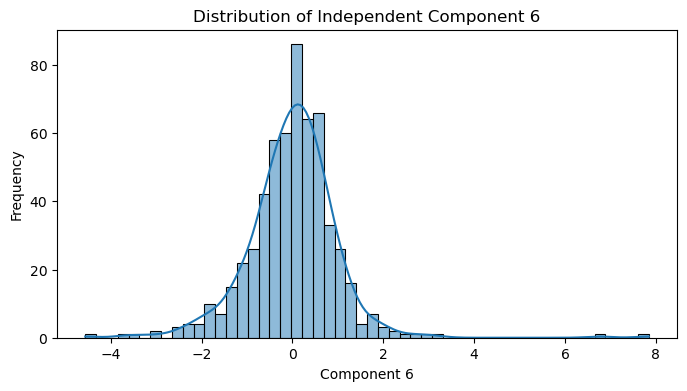

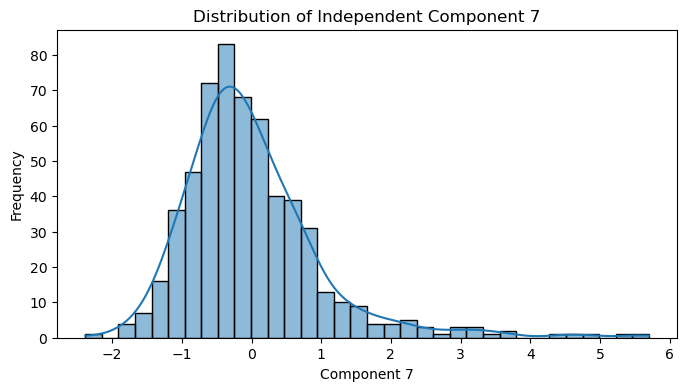

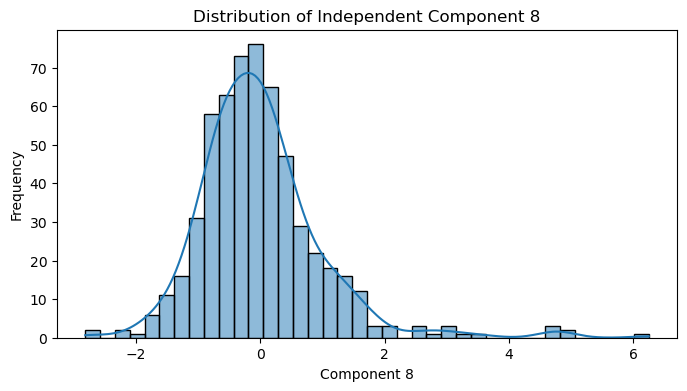

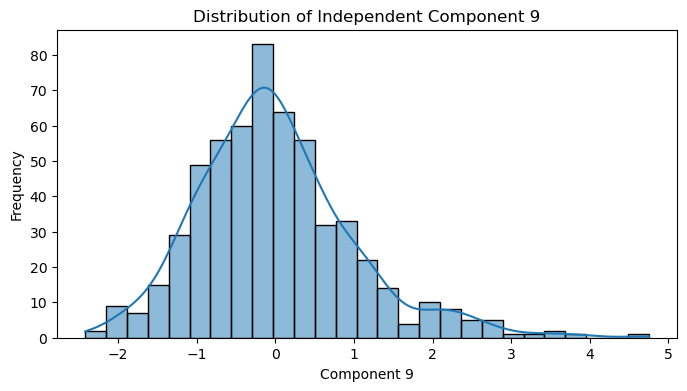

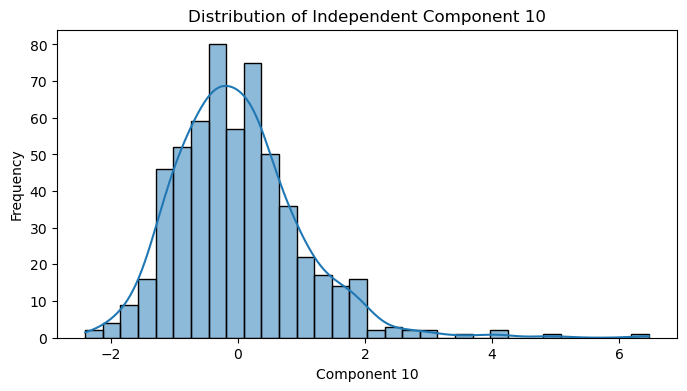

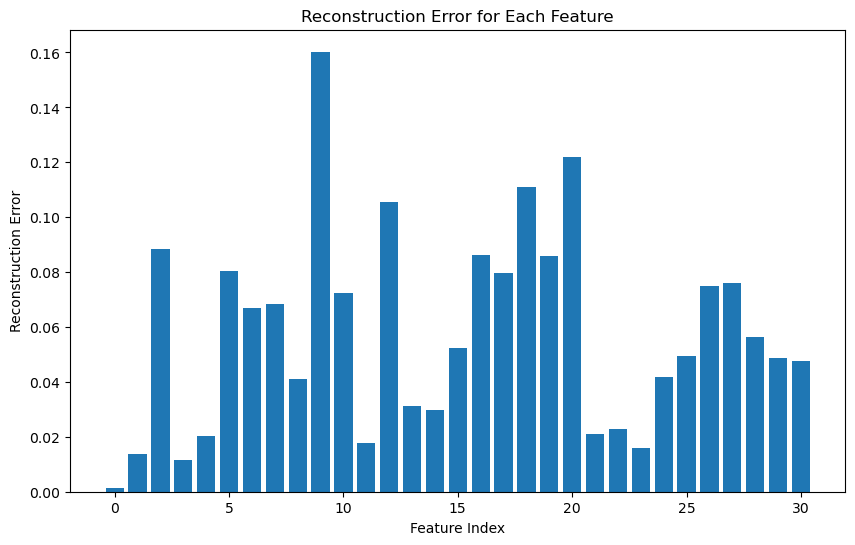

In [45]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_scaled' is scaled features from the breast cancer dataset
n_ica_components = 10  # for example, you might want to set this to 10

# Apply ICA with the number of components you wish to extract
ica = FastICA(n_components=n_ica_components, random_state=42)
X_ica = ica.fit_transform(X_scaled)  # Fit ICA on the scaled data

# Calculate kurtosis for each independent component
ica_kurtosis = kurtosis(X_ica, fisher=False)  # Fisher=False gives the regular kurtosis value

# Plotting the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_ica_components + 1), ica_kurtosis)
plt.title('Kurtosis for Each Independent Component')
plt.xlabel('Independent Component')
plt.ylabel('Kurtosis Value')
plt.show()

# Coefficient Plot
plt.figure(figsize=(12, 6))
sns.heatmap(ica.mixing_.T, cmap='viridis', fmt=".2f")
plt.title('ICA Coefficient Plot')
plt.xlabel('Original Features')
plt.ylabel('Independent Components')
plt.show()

# Distribution of Each Independent Component
for i, component in enumerate(X_ica.T, 1):
    plt.figure(figsize=(8, 4))
    sns.histplot(component, kde=True)
    plt.title(f'Distribution of Independent Component {i}')
    plt.xlabel(f'Component {i}')
    plt.ylabel('Frequency')
    plt.show()

# Reconstruction Error Plot
reconstruction_error = np.mean((X_scaled - ica.inverse_transform(X_ica)) ** 2, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(X_scaled.shape[1]), reconstruction_error)
plt.title('Reconstruction Error for Each Feature')
plt.xlabel('Feature Index')
plt.ylabel('Reconstruction Error')
plt.show()


In [49]:
selected_components = X_ica[:, [2, 4, 3, 5, 8]]

# Create a new DataFrame with the selected components
selected_ica_df = pd.DataFrame(data=selected_components,
                               columns=['Component_2', 'Component_4', 'Component_3', 'Component_5', 'Component_8'])

# Display the head of the new DataFrame
selected_ica_df.head()

Component_2  Component_4  Component_3  Component_5  Component_8
0    -3.006101     0.067255    -2.716194    -0.526930     1.198926
1    -0.543948    -0.291601    -0.241692    -1.930366    -1.035696
2    -0.833930    -0.858462    -0.401767    -0.753310     0.049866
3    -1.853156     2.375333     0.455653     0.138950     3.664882
4    -1.579894     0.142138    -0.726481    -0.879966    -1.226947

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

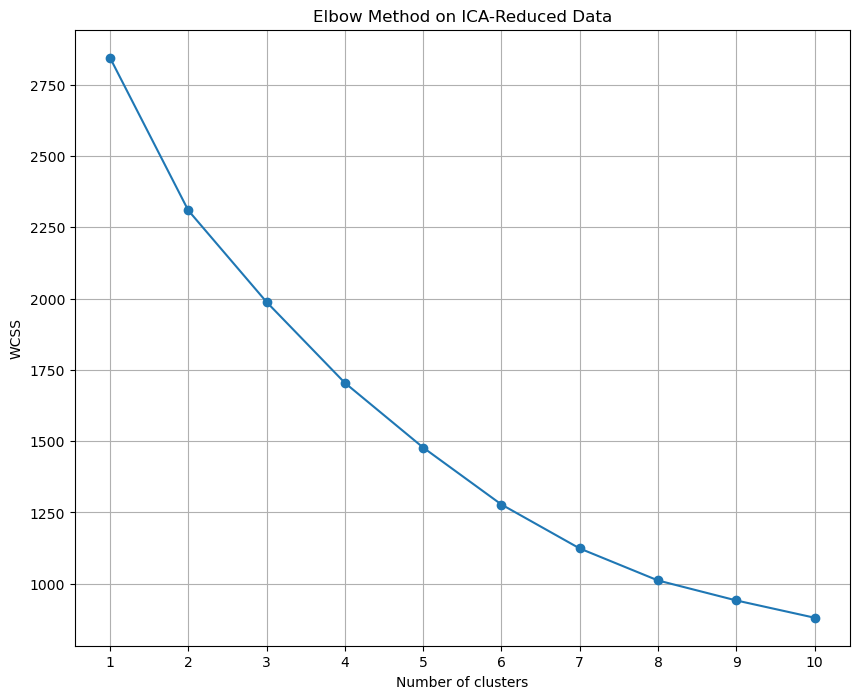

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the selected components from the ICA transformation
selected_components = X_ica[:, [1, 3, 2, 4, 7]]

# Create a new DataFrame with the selected components
selected_ica_df = pd.DataFrame(data=selected_components,
                               columns=['Component_2', 'Component_4', 'Component_3', 'Component_5', 'Component_8'])

# Convert the DataFrame to a NumPy array for KMeans
X_ica_selected = selected_ica_df.values

# Use the Elbow Method on the ICA-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_ica_selected)  # Fit KMeans on the ICA-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on ICA-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


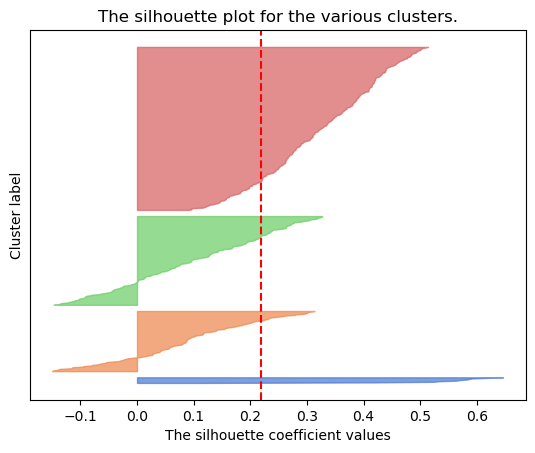

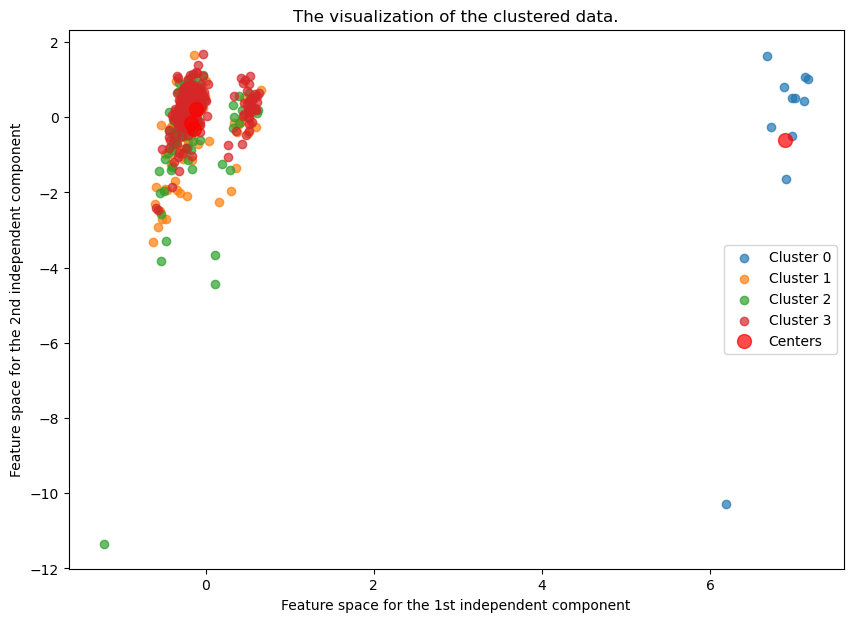

Homogeneity: 0.090
Completeness: 0.054
V-measure: 0.068
Adjusted Rand Index (ARI): 0.092


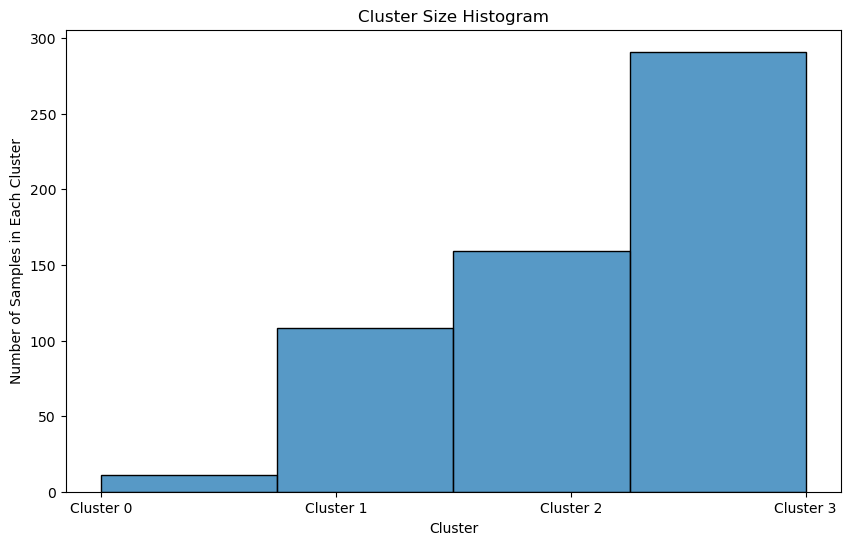

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Optimal number of clusters found from previous analysis
optimal_k = 4

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_ica_selected)  # Apply it on the ICA-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_ica_selected, clusters)
sample_silhouette_values = silhouette_samples(X_ica_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Remove the y-axis labels/ticks

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_ica_selected[cluster_mask, 0], X_ica_selected[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st independent component")
plt.ylabel("Feature space for the 2nd independent component")
plt.legend()
plt.show()

# Assuming y is the target variable from the original breast cancer dataset before encoding
if not np.issubdtype(y.dtype, np.integer):
    y_integer_encoded = LabelEncoder().fit_transform(y)
else:
    y_integer_encoded = y

# Calculate clustering metrics
homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

# Output the clustering metrics
print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

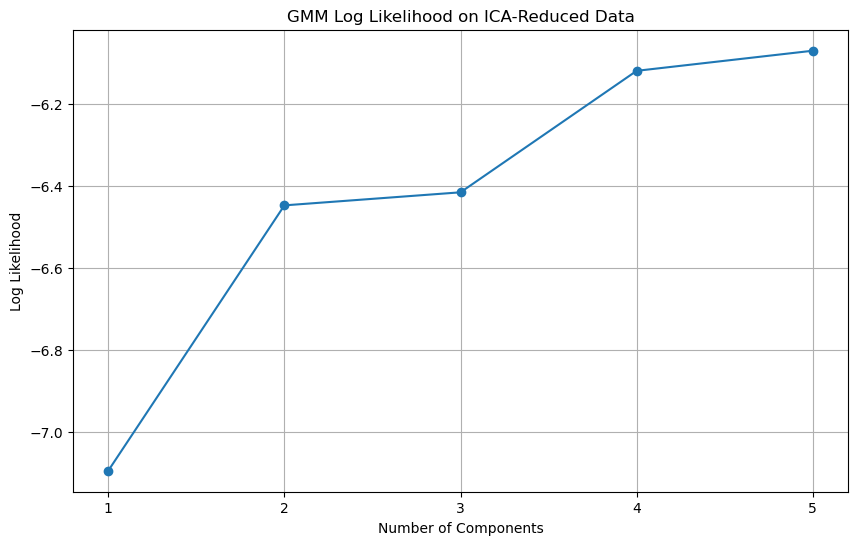

Component_2  Component_4  Component_3  Component_5  Component_8
0    -3.006101     0.067255    -2.716194    -0.526930     1.198926
1    -0.543948    -0.291601    -0.241692    -1.930366    -1.035696
2    -0.833930    -0.858462    -0.401767    -0.753310     0.049866
3    -1.853156     2.375333     0.455653     0.138950     3.664882
4    -1.579894     0.142138    -0.726481    -0.879966    -1.226947

In [54]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Selected components from the ICA transformation
selected_components = X_ica[:, [2, 4, 3, 5, 8]]

# Create a new DataFrame with the selected components
selected_ica_df = pd.DataFrame(data=selected_components,
                               columns=['Component_2', 'Component_4', 'Component_3', 'Component_5', 'Component_8'])

# We will check for the number of components from 1 to 5 (since we have 5 selected components)
n_components_range = range(1, len(selected_ica_df.columns) + 1)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(selected_ica_df)  # Fit GMM on the ICA-reduced data
    log_likelihoods.append(gmm.score(selected_ica_df))  # score() returns the log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on ICA-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

# Display the head of the new DataFrame
selected_ica_df.head()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


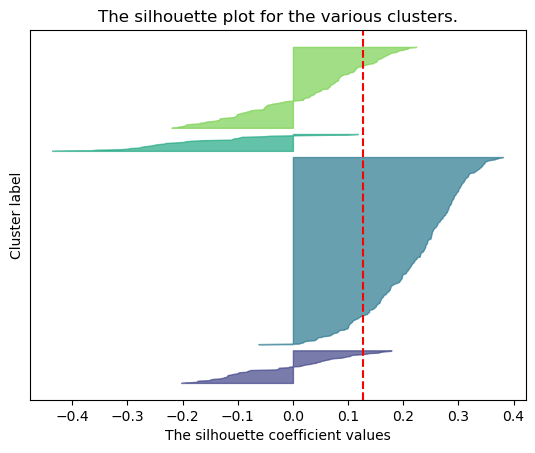

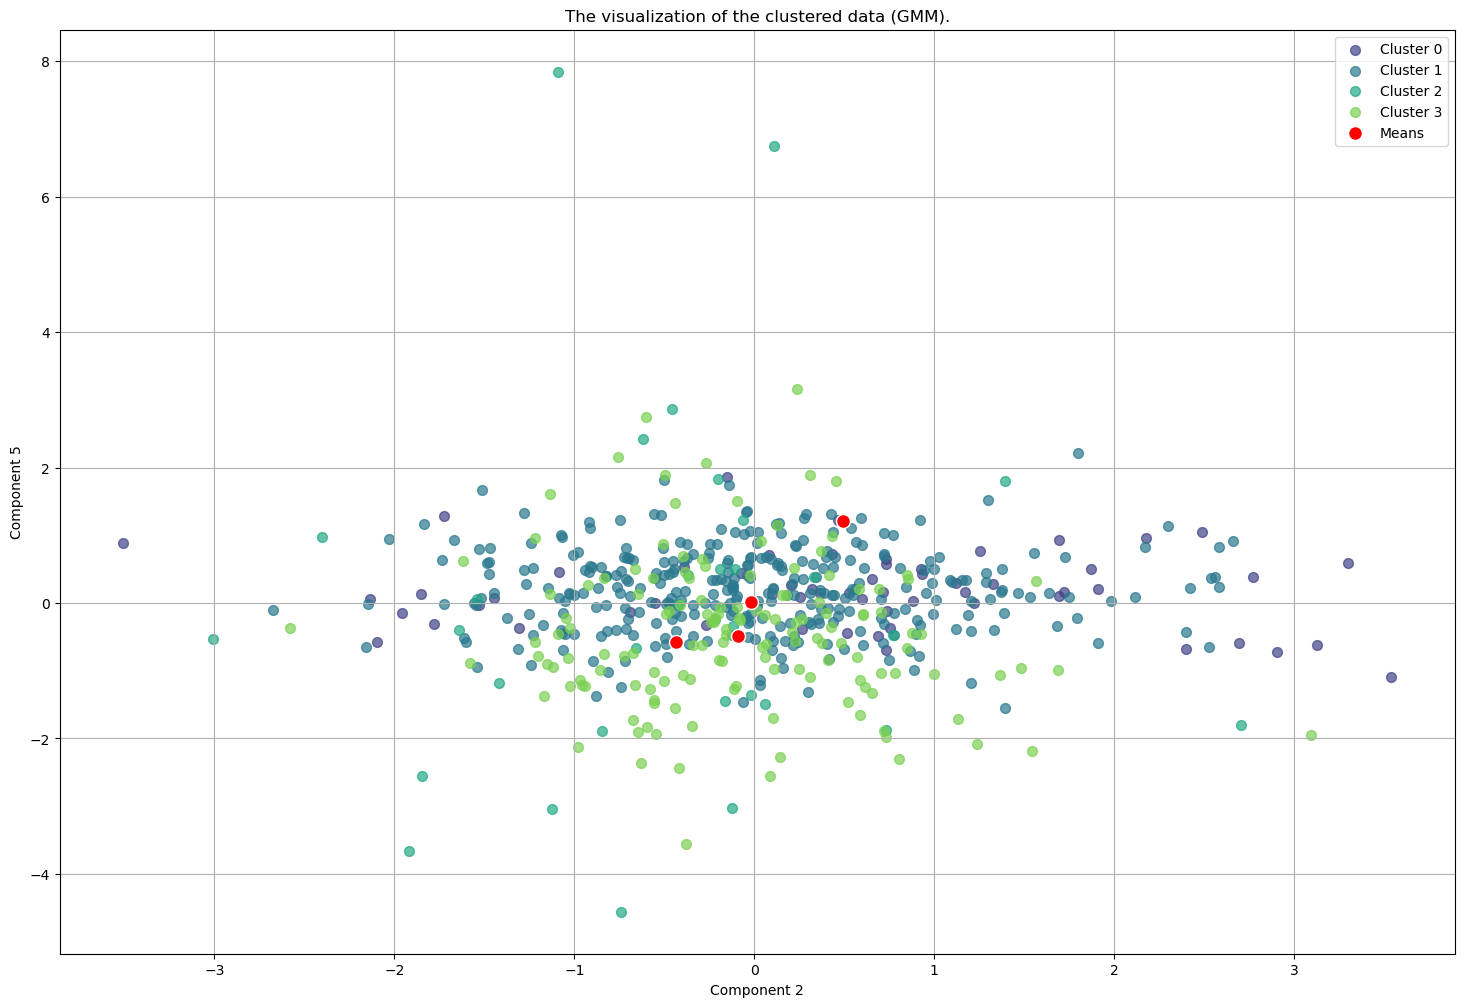

Homogeneity (GMM): 0.366
Completeness (GMM): 0.229
V-measure (GMM): 0.282
Adjusted Rand Index (GMM): 0.396


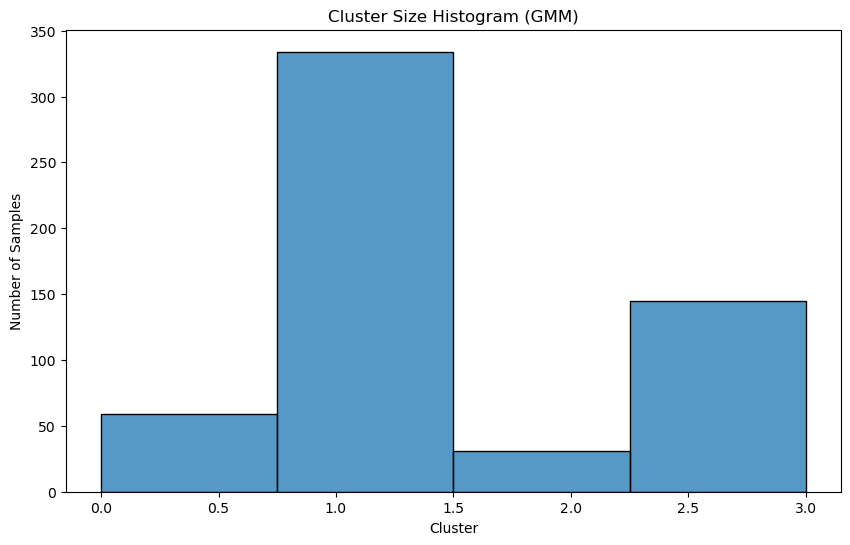

In [56]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import pandas as pd

optimal_k = 4  # Number of clusters you've decided based on your analysis

# Apply the Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(selected_ica_df)  # Using the ICA-reduced data

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(selected_ica_df, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(selected_ica_df, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(selected_ica_df.loc[cluster_mask, 'Component_2'], selected_ica_df.loc[cluster_mask, 'Component_5'], 
                s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Component 2")
plt.ylabel("Component 5")
plt.grid(True)
plt.legend()

plt.show()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Assuming 'y' is the target variable from your dataset
# In this case, it's not categorical, so no encoding is needed
y_encoded = y

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')


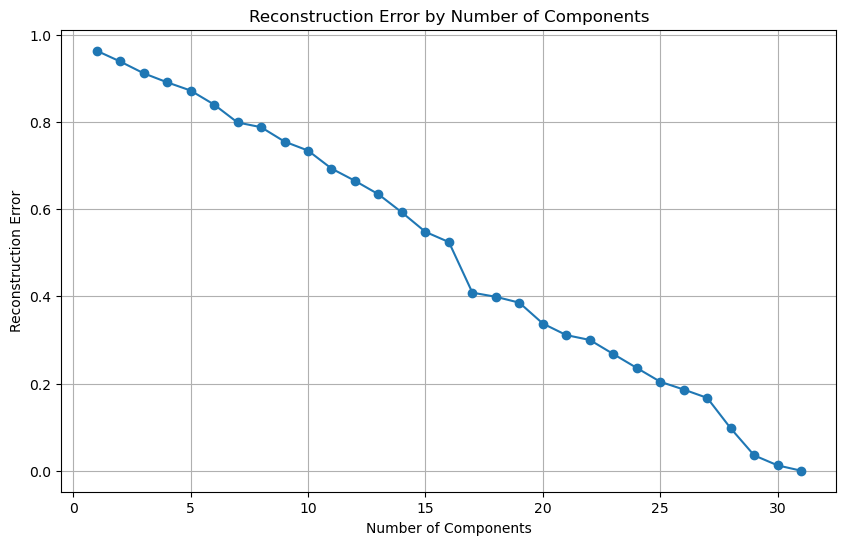

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# Initialize the list to store reconstruction errors
reconstruction_errors = []

# Define the range of components to test
component_range = range(1, X_scaled.shape[1] + 1)  # From 1 to the original number of features

for n_components in component_range:
    # Apply Gaussian Random Projection
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_projected = rp.fit_transform(X_scaled)
    
    # Calculate the reconstruction error
    reconstructed = rp.inverse_transform(X_projected)  # Project back to original space
    reconstruction_error = np.mean((X_scaled - reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)

# Plotting the Reconstruction Error Plot
plt.figure(figsize=(10, 6))
plt.plot(component_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Error by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

grp = GaussianRandomProjection(n_components=17, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])
print(reduced_data_df.head())

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -4.191565    -2.313735     3.622272     0.496833     0.768921   
1    -0.848287     0.280660     0.741826    -0.775585     1.475729   
2    -1.753926    -0.953442     2.053704    -0.614874     0.227707   
3    -2.927044    -2.049943     3.439881     0.773911    -2.060172   
4    -1.202968    -1.159903     0.818700    -0.310649     1.022902   

   Component_6  Component_7  Component_8  Component_9  Component_10  \
0     1.289910     2.740852    -4.051595    -2.233316      0.806421   
1     1.597680     0.379254    -0.545512     2.121635      0.099748   
2     1.039439     1.118876    -0.945763     1.087013      1.113864   
3     0.773698     1.448190    -4.841000    -3.782315      1.530983   
4     0.091944     0.548216    -0.479977     1.211560      0.927720   

   Component_11  Component_12  Component_13  Component_14  Component_15  \
0      1.524309     -0.880081     -2.681441     -1.241292     -4.607466   
1 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

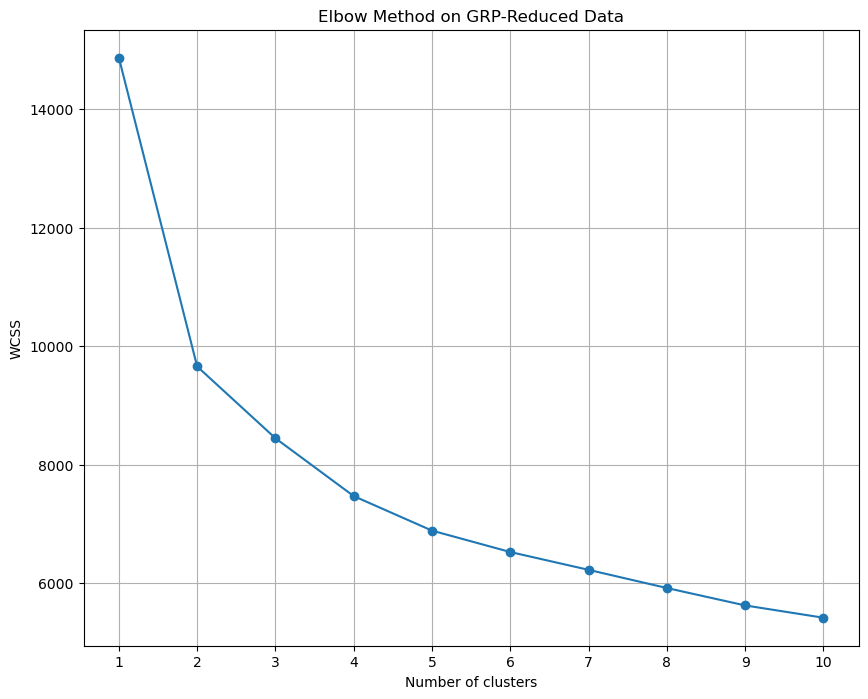

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_grp_selected = reduced_data_df.values  # Convert the DataFrame to a NumPy array for fitting KMeans

# Use the Elbow Method on the GRP-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_grp_selected)  # Fit KMeans on the GRP-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on GRP-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


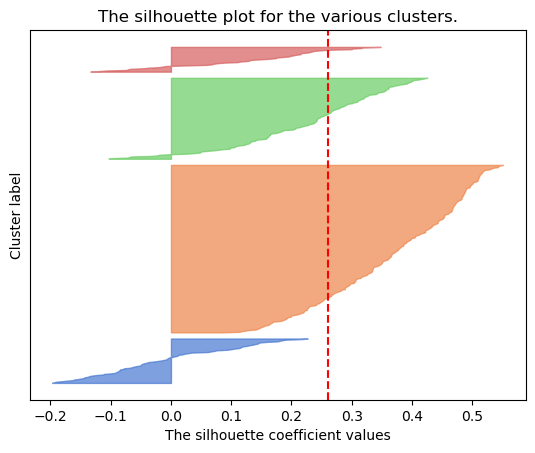

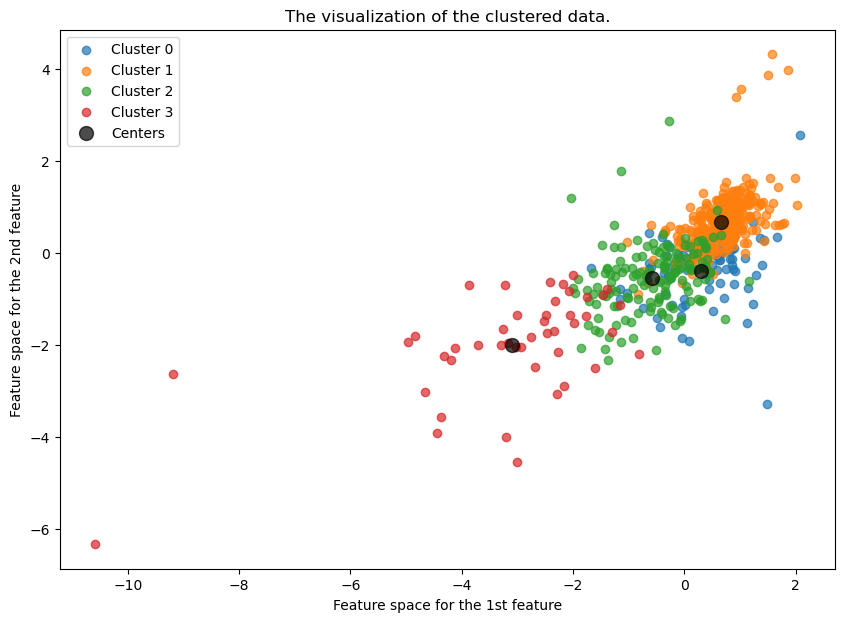

Homogeneity: 0.700
Completeness: 0.397
V-measure: 0.507
Adjusted Rand Index (ARI): 0.505


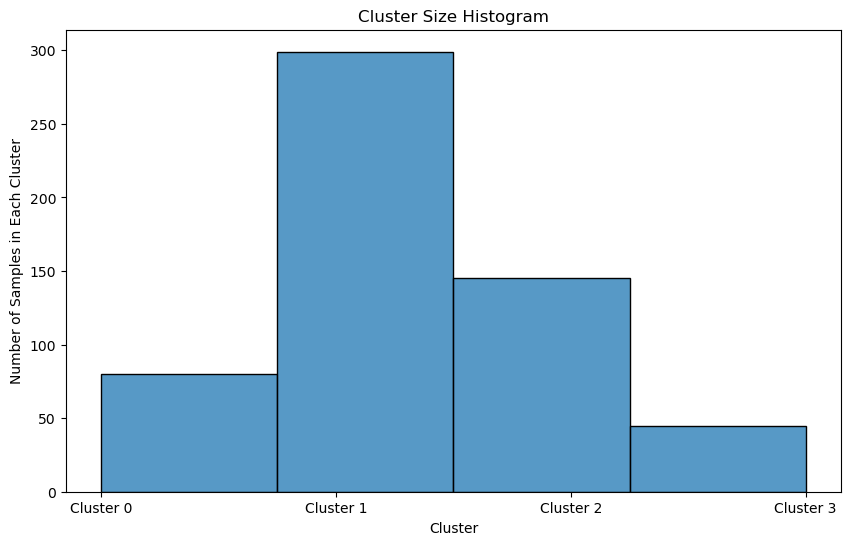

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

X_grp_selected = reduced_data_df.values

optimal_k = 4  

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_grp_selected)  # Apply it on the GRP-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_grp_selected, clusters)
sample_silhouette_values = silhouette_samples(X_grp_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_grp_selected[cluster_mask, 0], X_grp_selected[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.legend()
plt.show()

if not np.issubdtype(y.dtype, np.integer):
    y_encoded = LabelEncoder().fit_transform(y)
else:
    y_encoded = y

# Calculate clustering metrics
homogeneity = homogeneity_score(y_encoded, clusters)
completeness = completeness_score(y_encoded, clusters)
v_measure = v_measure_score(y_encoded, clusters)
ARI = adjusted_rand_score(y_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

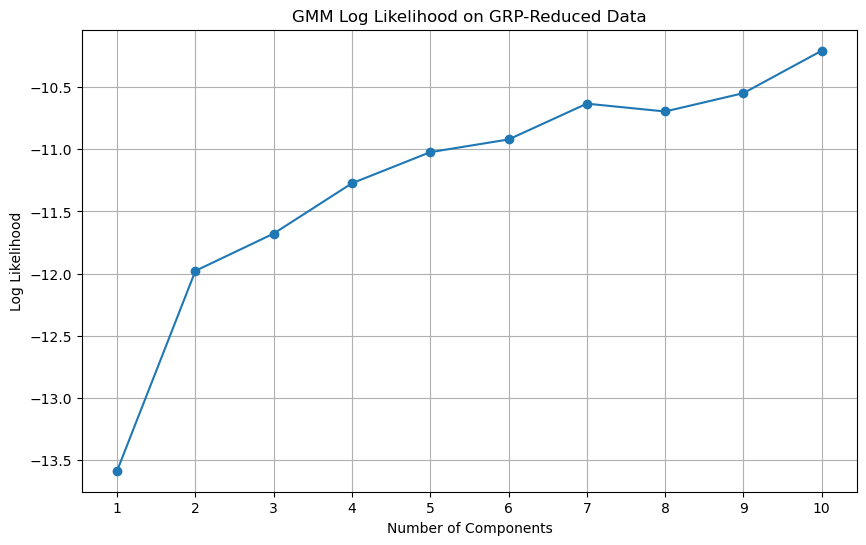

In [66]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler



# Apply Gaussian Random Projection to reduce the dimensionality of the data
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])

# Determine the number of components for the Gaussian Mixture Model
n_components_range = range(1, reduced_data_df.shape[1] + 1)
log_likelihoods = []

# Fit GMM on the GRP-reduced data and calculate log likelihood for each number of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(reduced_data_df)
    log_likelihoods.append(gmm.score(reduced_data_df))

# Plot the log likelihoods to observe the best number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on GRP-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


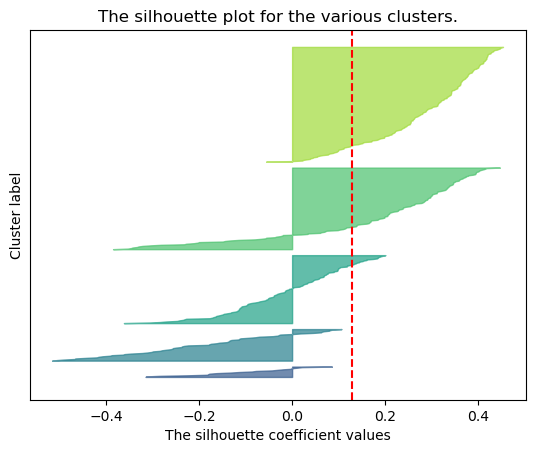

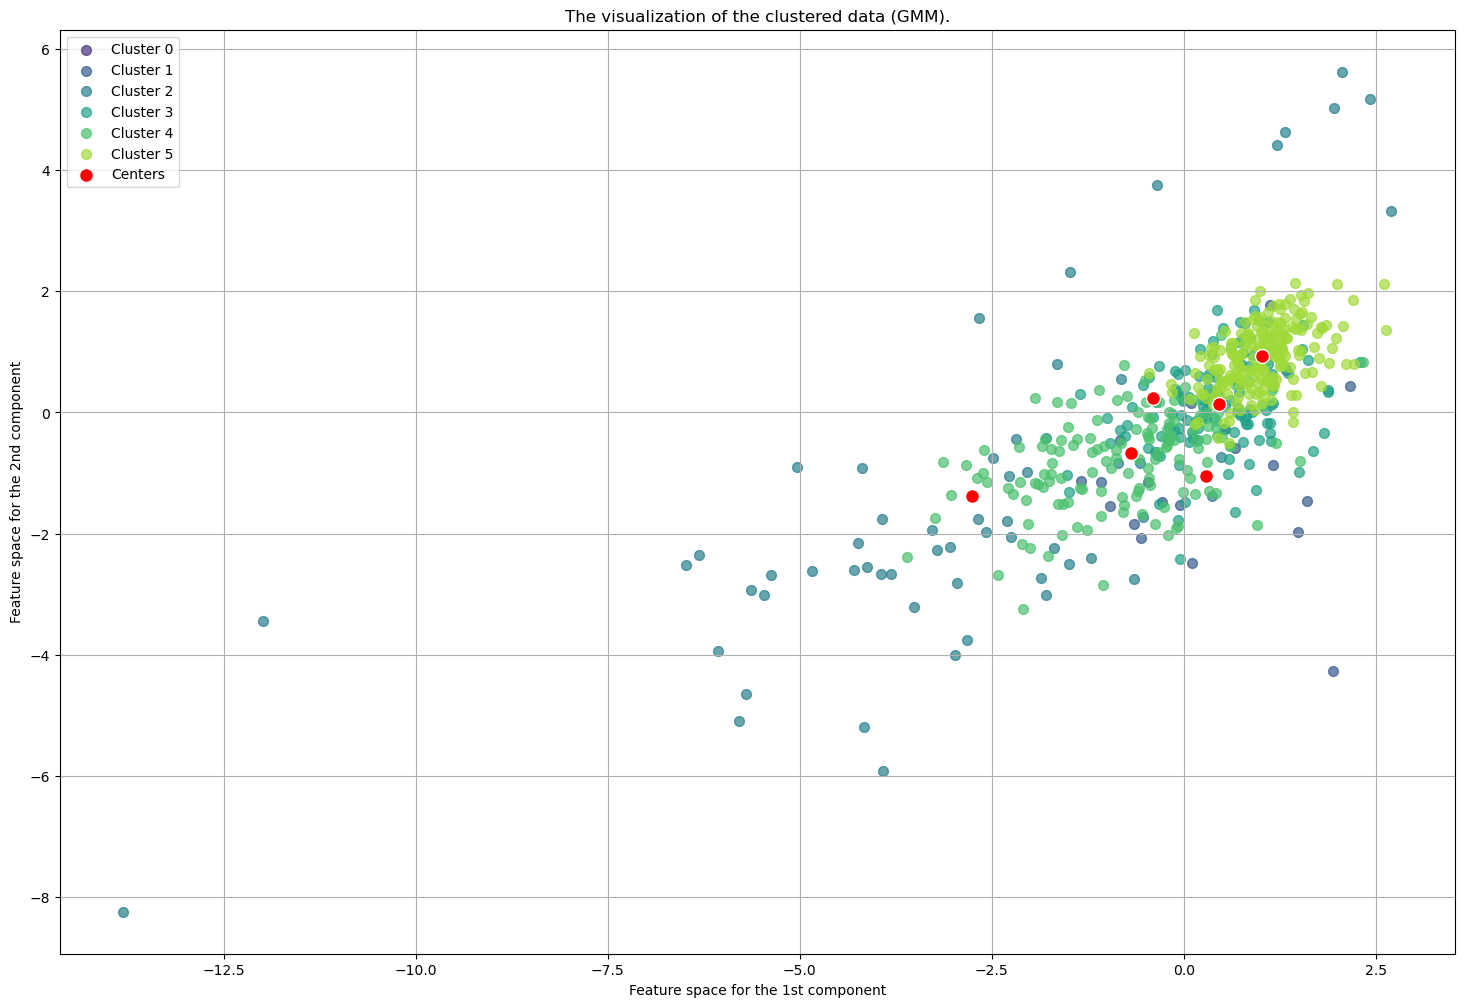

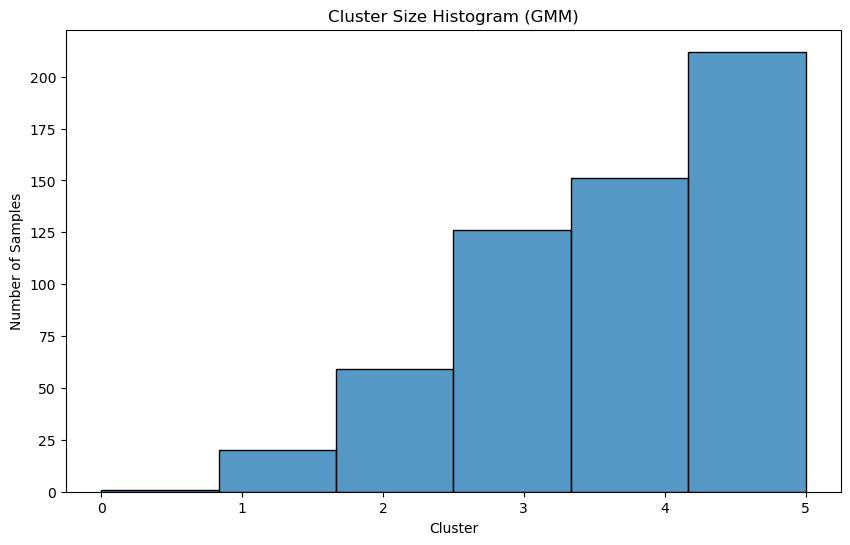

Homogeneity (GMM): 0.617
Completeness (GMM): 0.287
V-measure (GMM): 0.392
Adjusted Rand Index (GMM): 0.355


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_scaled is the scaled version of some original data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(original_data)

# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])

# Fit Gaussian Mixture Model
optimal_k = 6
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(reduced_data_df)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(reduced_data_df, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(reduced_data_df, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))
for i in range(optimal_k):
    cluster_mask = gmm_clusters == i
    plt.scatter(reduced_data_df.loc[cluster_mask, 'Component_1'], reduced_data_df.loc[cluster_mask, 'Component_2'], 
                s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Centers')

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st component")
plt.ylabel("Feature space for the 2nd component")
plt.grid(True)
plt.legend()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')


In [70]:
!pip install umap-learn


Defaulting to user installation because normal site-packages is not writeable


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')
bc_data.drop('Unnamed: 32', axis=1, inplace=True)
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))
y = bc_data['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Clustering with Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_grp)

# Calculate metrics
silhouette_avg = silhouette_score(X_grp, gmm_clusters)
homogeneity = homogeneity_score(y, gmm_clusters)
completeness = completeness_score(y, gmm_clusters)
v_measure = v_measure_score(y, gmm_clusters)

# Output the results
print(f"Silhouette: {silhouette_avg:.2f}, Homogeneity: {homogeneity:.2f}, Completeness: {completeness:.2f}, V-measure: {v_measure:.2f}")


Silhouette: 0.20, Homogeneity: 0.40, Completeness: 0.28, V-measure: 0.33


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


      UMAP1     UMAP2
0  3.801554  4.828743
1  4.642138  6.649991
2  3.961427  5.243532
3  5.966321  4.371457
4  3.799125  6.815183


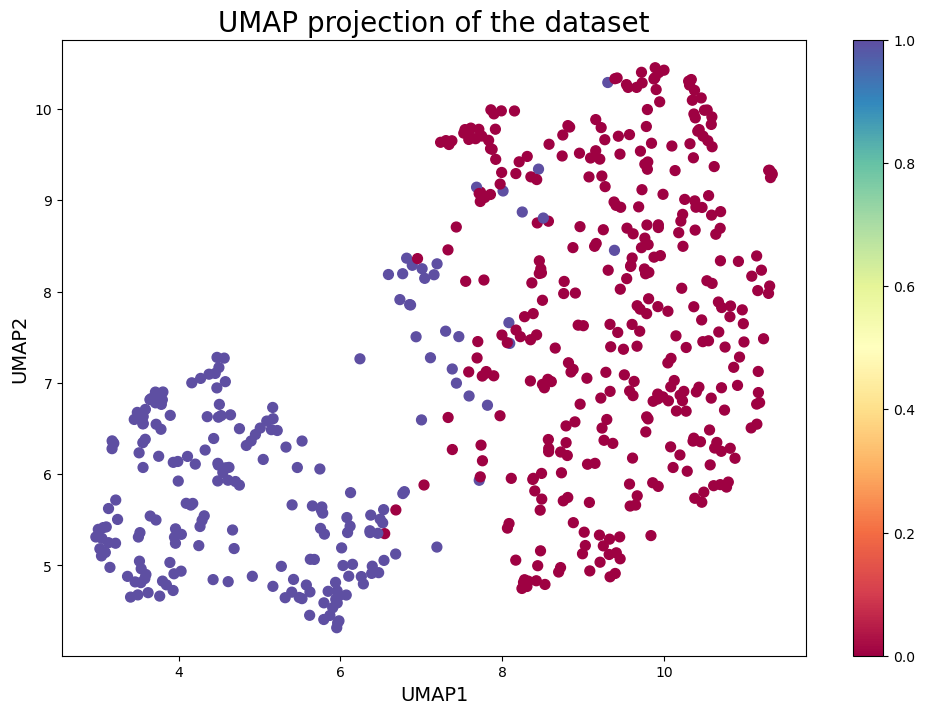

In [74]:
import umap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_scaled' is your feature matrix after scaling and 'y' is the target variable

# Initialize and fit UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Convert the transformed data into a DataFrame for easier manipulation and visualization
X_umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

# Display the first few rows of the transformed data
print(X_umap_df.head())

# Now visualize the UMAP-reduced data
plt.figure(figsize=(12, 8))
plt.scatter(X_umap_df['UMAP1'], X_umap_df['UMAP2'], c=y, cmap='Spectral', s=50)
plt.colorbar()
plt.title('UMAP projection of the dataset', fontsize=20)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.show()


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_sta

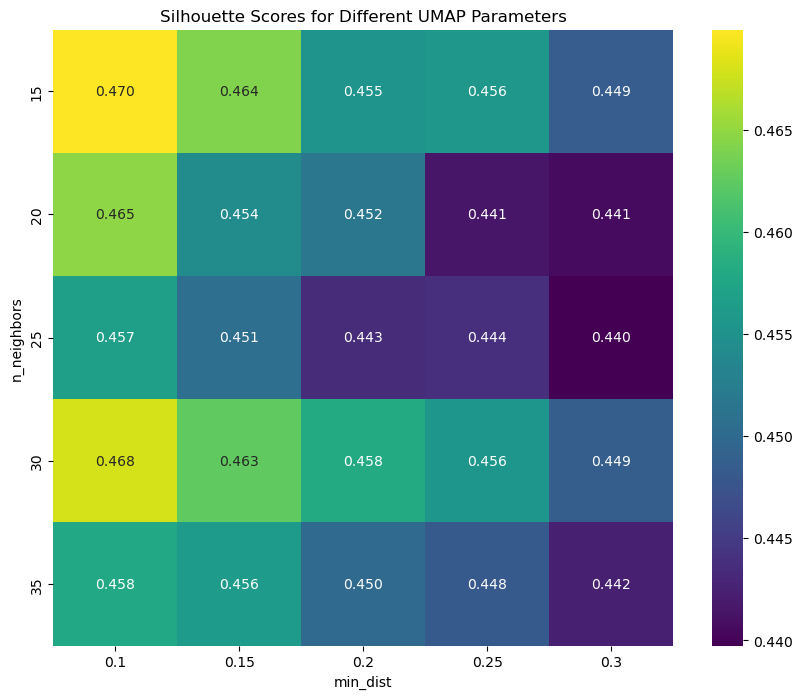

In [75]:
from sklearn.metrics import silhouette_score
import numpy as np
import seaborn as sns
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


k = 3  

# Define ranges for n_neighbors and min_dist
n_neighbors_range = range(15, 36, 5)
min_dist_range = np.linspace(0.1, 0.3, num=5)

# Initialize a list to store the silhouette scores
silhouette_scores = []

for n_neighbors in n_neighbors_range:
    for min_dist in min_dist_range:
        # Apply UMAP with the current parameters
        umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        X_umap = umap_reducer.fit_transform(X_scaled)
        
        # Perform clustering (e.g., KMeans) on the reduced data and calculate the silhouette score
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_umap)
        score = silhouette_score(X_umap, kmeans.labels_)
        
        # Store the parameters and the score
        silhouette_scores.append((n_neighbors, min_dist, score))

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(silhouette_scores, columns=['n_neighbors', 'min_dist', 'silhouette_score'])

# Use Seaborn to create a heatmap to visualize the scores
plt.figure(figsize=(10, 8))
heatmap_data = results_df.pivot(index='n_neighbors', columns='min_dist', values='silhouette_score')
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Silhouette Scores for Different UMAP Parameters')
plt.show()


In [77]:
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Set your UMAP parameters
n_neighbors = 15
min_dist = 0.10
optimal_k = 3  # Assuming optimal_k is the best number of clusters previously determined

# Range of n_components to try
n_components_range = range(1, 13)
# Initialize lists to store the results
silhouette_scores = []
kmeans_scores = []

# Loop over the range of n_components
for n_components in n_components_range:
    # Apply UMAP reduction
    umap_reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
    X_umap = umap_reducer.fit_transform(X_scaled)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_umap)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_umap, clusters)
    silhouette_scores.append((n_components, silhouette_avg))

    # Compute clustering performance, for instance, the inertia (sum of squared distances to closest cluster center)
    kmeans_score = kmeans.inertia_
    kmeans_scores.append((n_components, kmeans_score))

# Convert the results to a DataFrame for easier analysis
silhouette_results_df = pd.DataFrame(silhouette_scores, columns=['n_components', 'silhouette_score'])
kmeans_results_df = pd.DataFrame(kmeans_scores, columns=['n_components', 'kmeans_score'])

# Output the dataframes to the console
silhouette_results_df, kmeans_results_df



C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_sta

(    n_components  silhouette_score
 0              1          0.595612
 1              2          0.469894
 2              3          0.416560
 3              4          0.415689
 4              5          0.413199
 5              6          0.414009
 6              7          0.407937
 7              8          0.414852
 8              9          0.411638
 9             10          0.405685
 10            11          0.417466
 11            12          0.413251,
     n_components  kmeans_score
 0              1   1991.253174
 1              2   1088.510986
 2              3    944.122437
 3              4    923.834290
 4              5    916.243042
 5              6    914.643494
 6              7    917.716431
 7              8    936.580322
 8              9    935.214294
 9             10    926.002258
 10            11    908.331177
 11            12    921.450012)

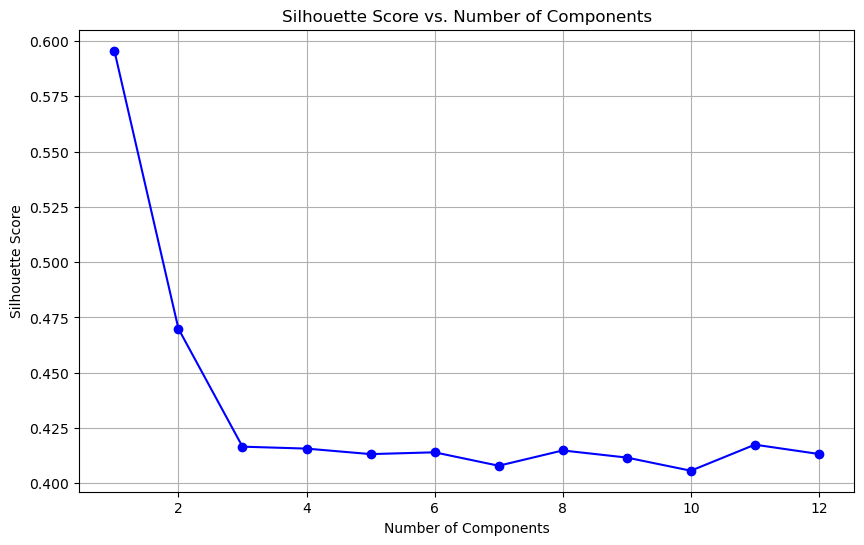

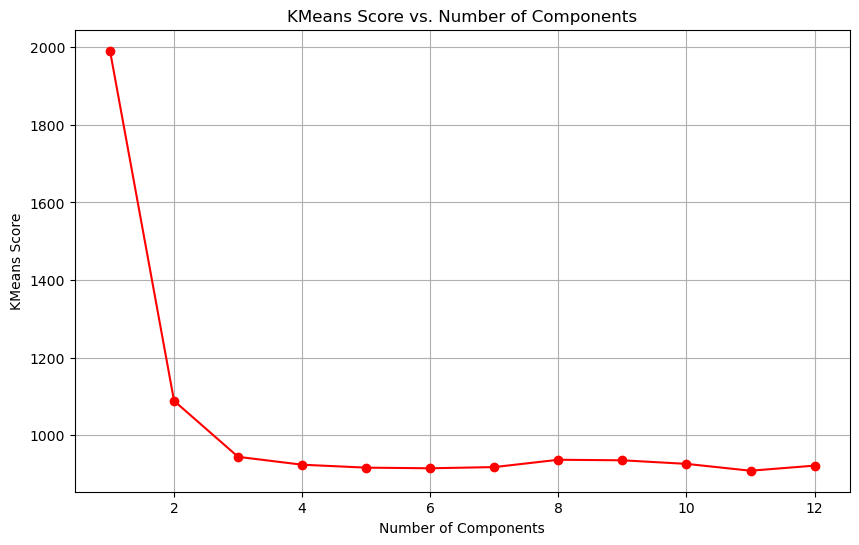

In [78]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(silhouette_results_df['n_components'], silhouette_results_df['silhouette_score'], marker='o', color='b')
plt.title('Silhouette Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot KMeans scores
plt.figure(figsize=(10, 6))
plt.plot(kmeans_results_df['n_components'], kmeans_results_df['kmeans_score'], marker='o', color='r')
plt.title('KMeans Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('KMeans Score')
plt.grid(True)
plt.show()


In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

# Load the dataset
bc_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3\\Breast Cancer Wisconsin.csv')
bc_data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)  # Drop 'id' and 'Unnamed: 32'
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})  # Encode 'M' as 1 and 'B' as 0

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bc_data.drop('diagnosis', axis=1))

umap_reducer = UMAP(n_neighbors=15, min_dist=0.15, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

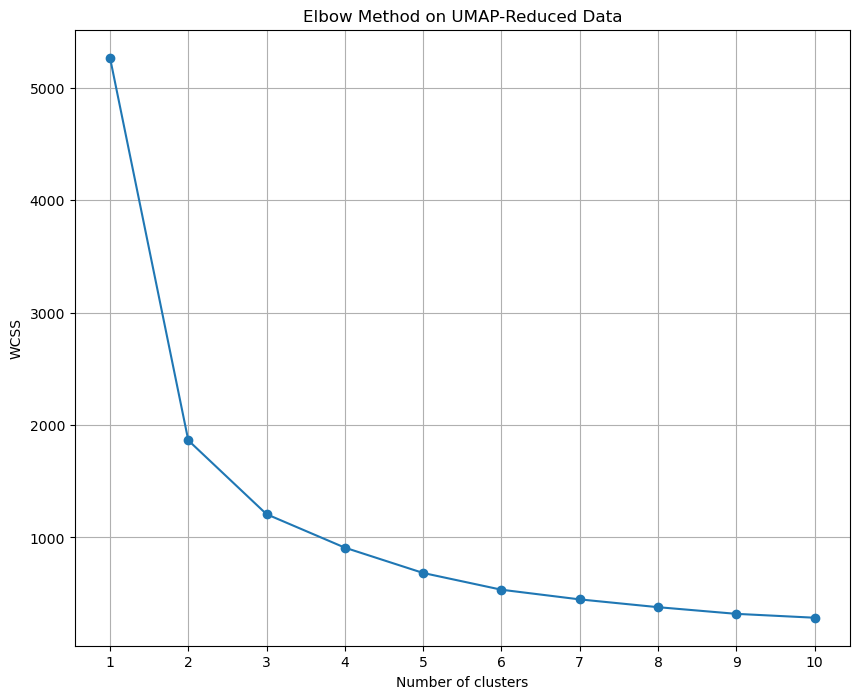

In [81]:
# Use the Elbow Method on the UMAP-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_umap)  # Fit KMeans on the UMAP-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on UMAP-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


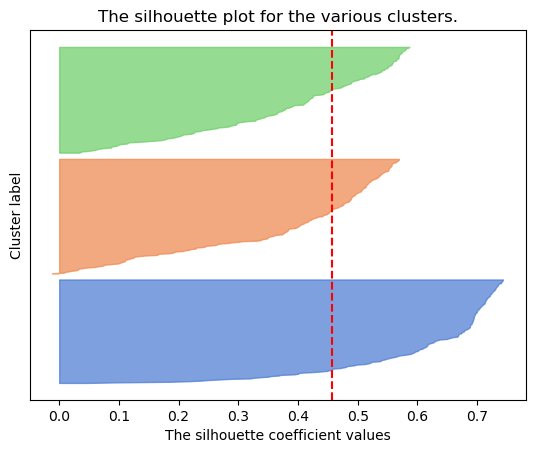

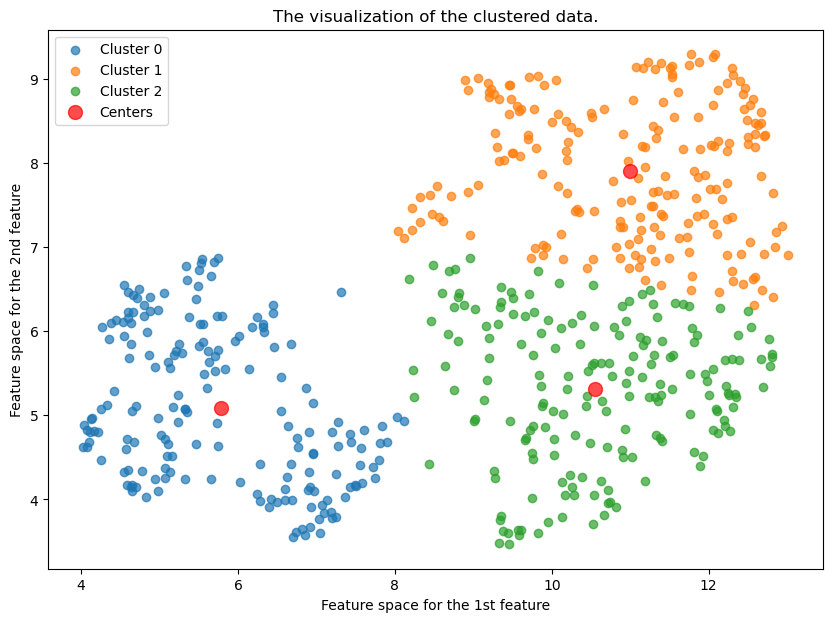

Homogeneity: 0.677
Completeness: 0.407
V-measure: 0.509
Adjusted Rand Index (ARI): 0.464


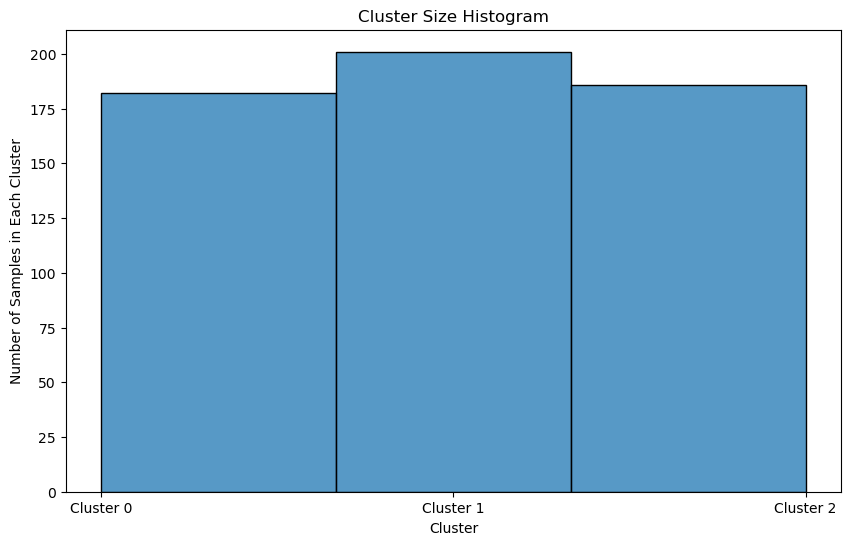

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP reduced data
X_umap_selected = X_umap

# Optimal number of clusters found from previous analysis
optimal_k = 3
# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_umap_selected)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_umap_selected, clusters)
sample_silhouette_values = silhouette_samples(X_umap_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_umap_selected[cluster_mask, 0], X_umap_selected[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.legend()
plt.show()

# Calculate Metrics
y_integer_encoded = LabelEncoder().fit_transform(y) if not np.issubdtype(y.dtype, np.integer) else y

homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

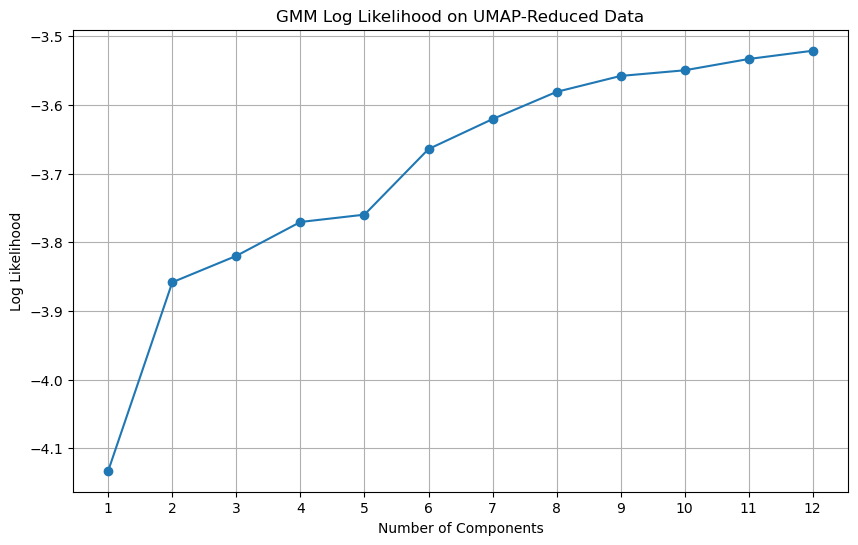

In [84]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming X_umap is your UMAP-reduced dataset from the previous step
# We will check for the number of components from 1 to a maximum number (you could use the number of UMAP components)
n_components_range = range(1, 13)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_umap)  # Fit GMM on the UMAP-reduced data
    log_likelihoods.append(gmm.score(X_umap))  # score() returns the log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on UMAP-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


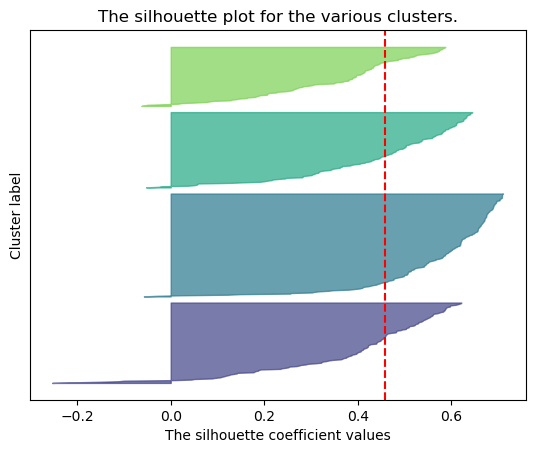

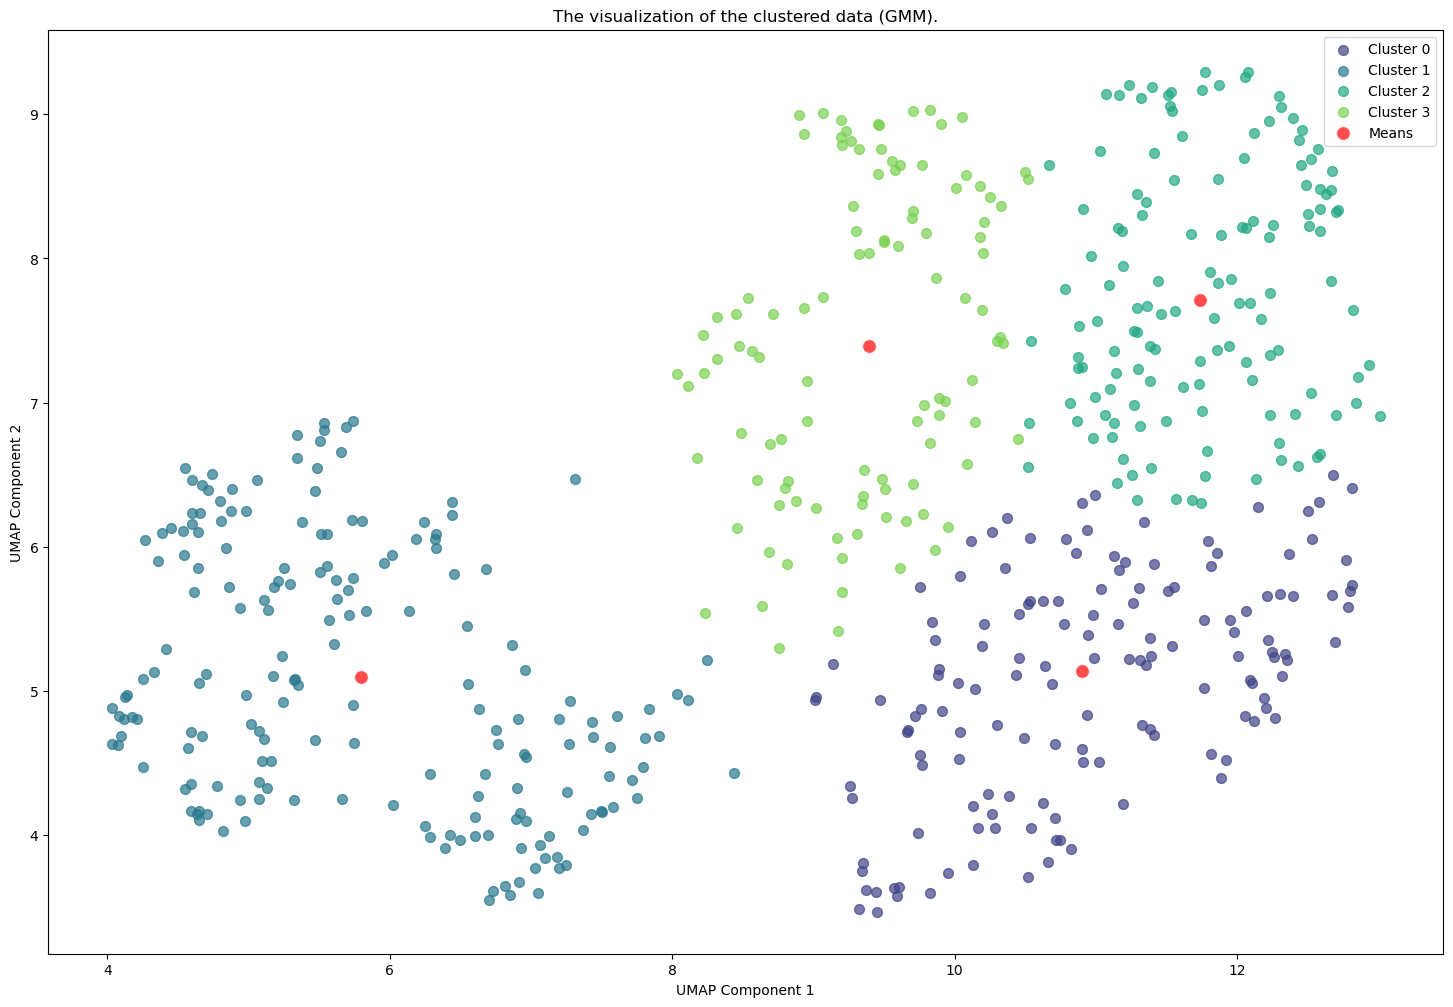

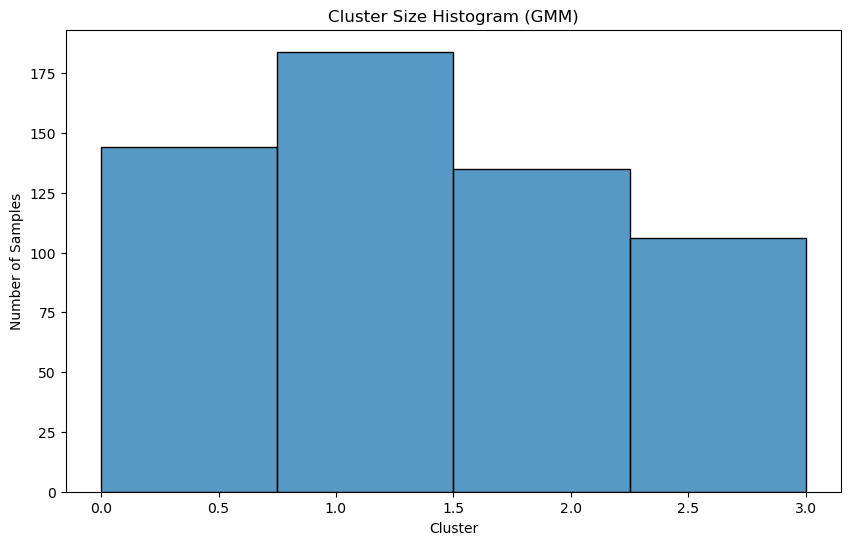

Homogeneity (GMM): 0.743
Completeness (GMM): 0.359
V-measure (GMM): 0.484
Adjusted Rand Index (GMM): 0.392


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Assuming X_umap is your UMAP-reduced dataset from the previous step
# Assuming y is your target variable

# Set the number of components for GMM based on your previous analysis
optimal_k = 4

# Fit Gaussian Mixture Model on UMAP-reduced data
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_umap)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_umap, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_umap, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter Plot for GMM clusters
plt.figure(figsize=(18, 12))

for i in range(optimal_k):
    cluster_mask = gmm_clusters == i
    plt.scatter(X_umap[cluster_mask, 0], X_umap[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', label='Means', alpha=0.7)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()

plt.show()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

plt.show()

# Calculate Metrics for GMM - make sure y is encoded if it's not numeric
y_encoded = LabelEncoder().fit_transform(y) if not np.issubdtype(y.dtype, np.integer) else y

gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')
